In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None) #To exapnd the output cell.
%matplotlib inline

In [2]:
#Importing and Reading our data.
appdf=pd.read_csv('application_data.csv')
prevdf=pd.read_csv('previous_application.csv')

In [3]:
appdf.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
prevdf.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Checking our DataFrames
print('No. of rows and columns in appdf:',appdf.shape)
print('No.of rows and columns in prevdf:',prevdf.shape)

No. of rows and columns in appdf: (307511, 122)
No.of rows and columns in prevdf: (1670214, 37)


In [6]:
appdf.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

In [7]:
prevdf.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

### Data Cleaning and Manipulation

In [8]:
#creating a fcuntion to check the percentage of missing values in dataframe columns

def check_null_values(dataset):
    final_output=round(dataset.isnull().sum()/len(dataset.index)*100,2)#dataset.shape[0]*100,2)
    return final_output

In [9]:
#Lets check application_data columns for the null values by getting percentage of missing values in columns.

check_null_values(appdf)        # calling the function to check null values

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

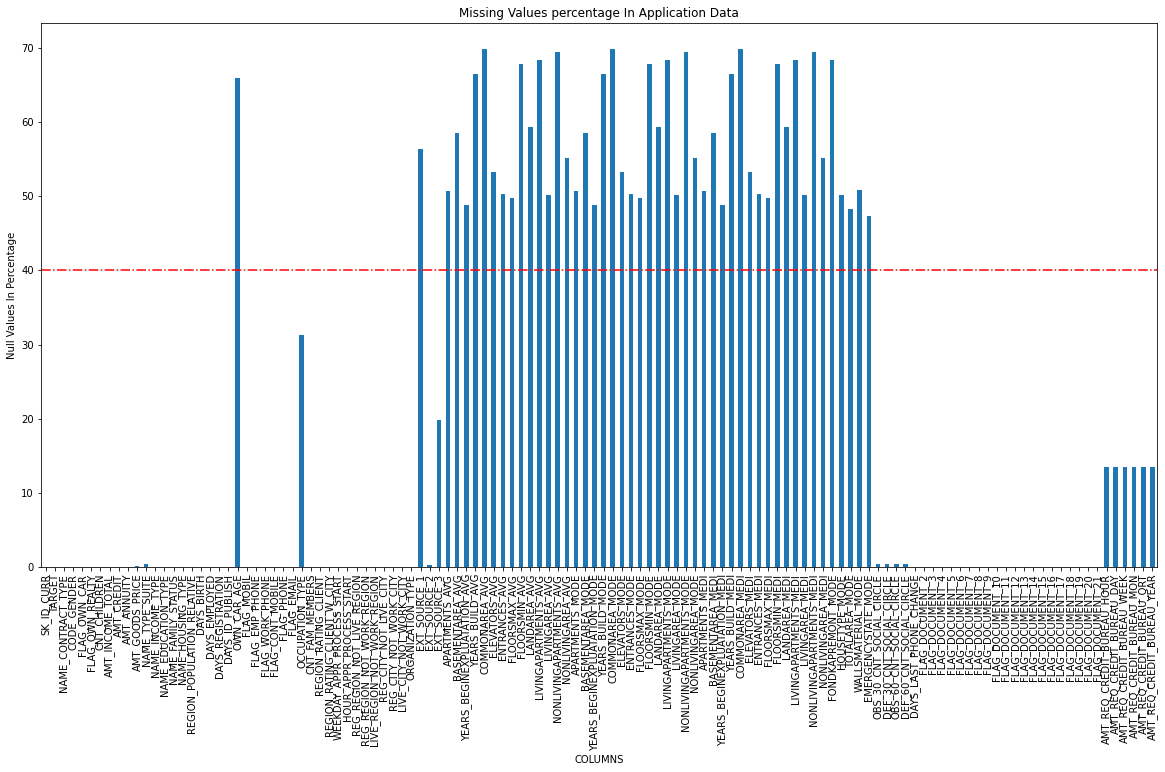

In [10]:
#plotting bar plot to visualize columns of application data which have missing values percentage more than 40%.
plt.figure(figsize=(20,10))
plt.axhline(40,ls='-.',color='red')
check_null_values(appdf).plot.bar()
plt.title('Missing Values percentage In Application Data')
plt.xlabel('COLUMNS')
plt.ylabel('Null Values In Percentage')
plt.show()

###### INFERENCES
###### We can see from the plot that the columns above redline mark are the columns with missing values more 40% and the columns
###### with less than 40% missin values are less than redline mark

In [11]:
#Lets get the columns with the null values equal to or greater than 40%
null_columns_appdf=pd.DataFrame(appdf.isnull().sum()/len(appdf.index)*100).reset_index()
null_columns_appdf.columns=['column names','null values percent'] # giving column names


null_columns_40_appdf=null_columns_appdf[null_columns_appdf['null values percent']>=40]
null_columns_40_appdf

,column names,null values percent
21,OWN_CAR_AGE,65.990810
41,EXT_SOURCE_1,56.381073
44,APARTMENTS_AVG,50.749729
45,BASEMENTAREA_AVG,58.515956
46,YEARS_BEGINEXPLUATATION_AVG,48.781019
47,YEARS_BUILD_AVG,66.497784
48,COMMONAREA_AVG,69.872297
49,ELEVATORS_AVG,53.295980
50,ENTRANCES_AVG,50.348768
51,FLOORSMAX_AVG,49.760822


In [12]:
len(null_columns_40_appdf)

49

###### INFERENCES
###### After taking the cut off value as 40% for missing values we can see that 49 columns have missing values more than 40%.
###### Majority of the clolumns with missing values are related  to the estate/property owned by the applicants.

#### prevdf Missing Values

In [13]:
# Now Lets check previous_application columns for the null values by getting percentage of missing values in columns.
check_null_values(prevdf)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

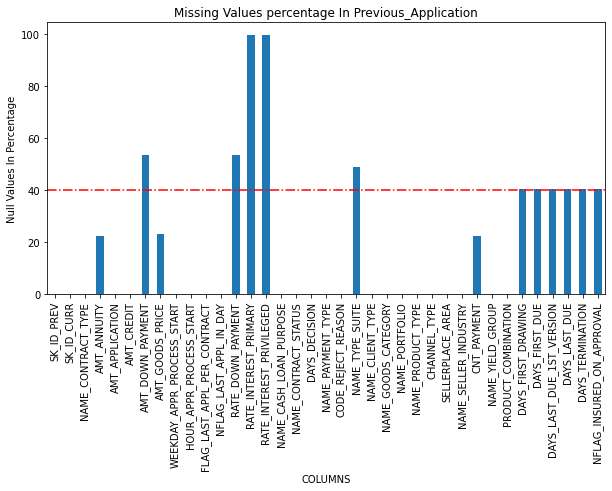

In [14]:
#plotting bar plot to visualize columns of previous application data which have missing values percentage more than 40%.
plt.figure(figsize=(10,5))
plt.axhline(40,ls='-.',color='red')
check_null_values(prevdf).plot.bar()
plt.title('Missing Values percentage In Previous_Application')
plt.xlabel('COLUMNS')
plt.ylabel('Null Values In Percentage')
plt.show()

###### INFERENCES
###### Here also as we can see their are many columns in previous_application_data whose null values are more than 40%

In [15]:
#Lets get the columns with the null values greater than 40%.
null_columns_prevdf=pd.DataFrame(prevdf.isnull().sum()/len(prevdf.index)*100).reset_index()
null_columns_prevdf.columns=['column names','null values percent'] # giving column names


null_columns_40_prevdf=null_columns_prevdf[null_columns_prevdf['null values percent']>=40]
null_columns_40_prevdf

,column names,null values percent
6,AMT_DOWN_PAYMENT,53.636480
12,RATE_DOWN_PAYMENT,53.636480
13,RATE_INTEREST_PRIMARY,99.643698
14,RATE_INTEREST_PRIVILEGED,99.643698
20,NAME_TYPE_SUITE,49.119754
31,DAYS_FIRST_DRAWING,40.298129
32,DAYS_FIRST_DUE,40.298129
33,DAYS_LAST_DUE_1ST_VERSION,40.298129
34,DAYS_LAST_DUE,40.298129
35,DAYS_TERMINATION,40.298129


In [16]:
len(null_columns_40_prevdf)

11

###### INFERENCES
###### After taking the cut off value as 40% for missing values we can see that 11 columns have missing values more than 40%.

### Deleting the unnecessary column from application data.
#### Checking correlation of all the contact details columns behaviour against Target column.

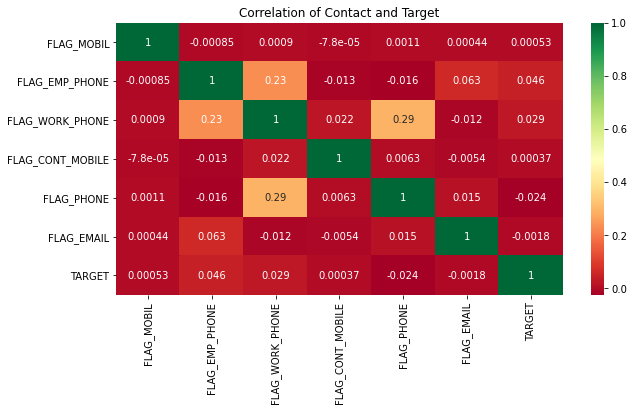

In [17]:
#plotting heatmap for correlation of unnessary columns.
contact_details_columns=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE','FLAG_PHONE', 'FLAG_EMAIL','TARGET']
plt.figure(figsize=(10,5))
sns.heatmap(appdf[contact_details_columns].corr(),annot=True,cmap='RdYlGn')
plt.title('Correlation of Contact and Target')
plt.show()

###### INFERENCES
###### Accordidng to above heatmap their is no correlation seen between the contact details columns and target column,so we need to remove these columns also.

#### Checking correlation of all the EXT_SOURCE_X columns and verify it by comparing it with Target column.

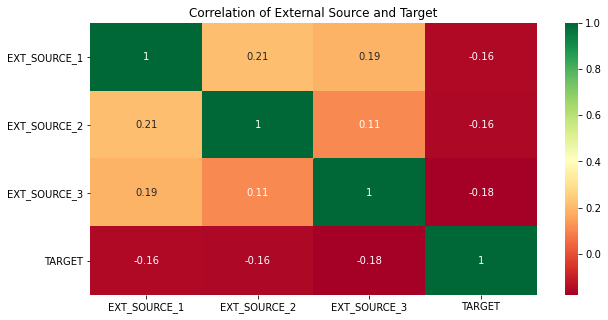

In [18]:
#plotting heatmap for EXT_SOURCE columns and TARGET variable to check the relation bewteen them.
Ext_source_columns=["EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3","TARGET"]
plt.figure(figsize=(10,5))
sns.heatmap(appdf[Ext_source_columns].corr(),annot=True,cmap='RdYlGn')
plt.title('Correlation of External Source and Target')
plt.show()

###### INFERENCES
###### Here also accordidng to above heatmap their is no correlation seen between the Ext_source  columns and target column,so we need to remove these columns also.

In [19]:
#Getting all the flag_document columns from the list of columns in appdf dataset

documents_columns=[x for x in appdf.columns if 'FLAG_DOCUMENT' in x]
documents_columns

['FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

#### Checking effect of all the FLAG_DOCUMENT_X columns on Target column.

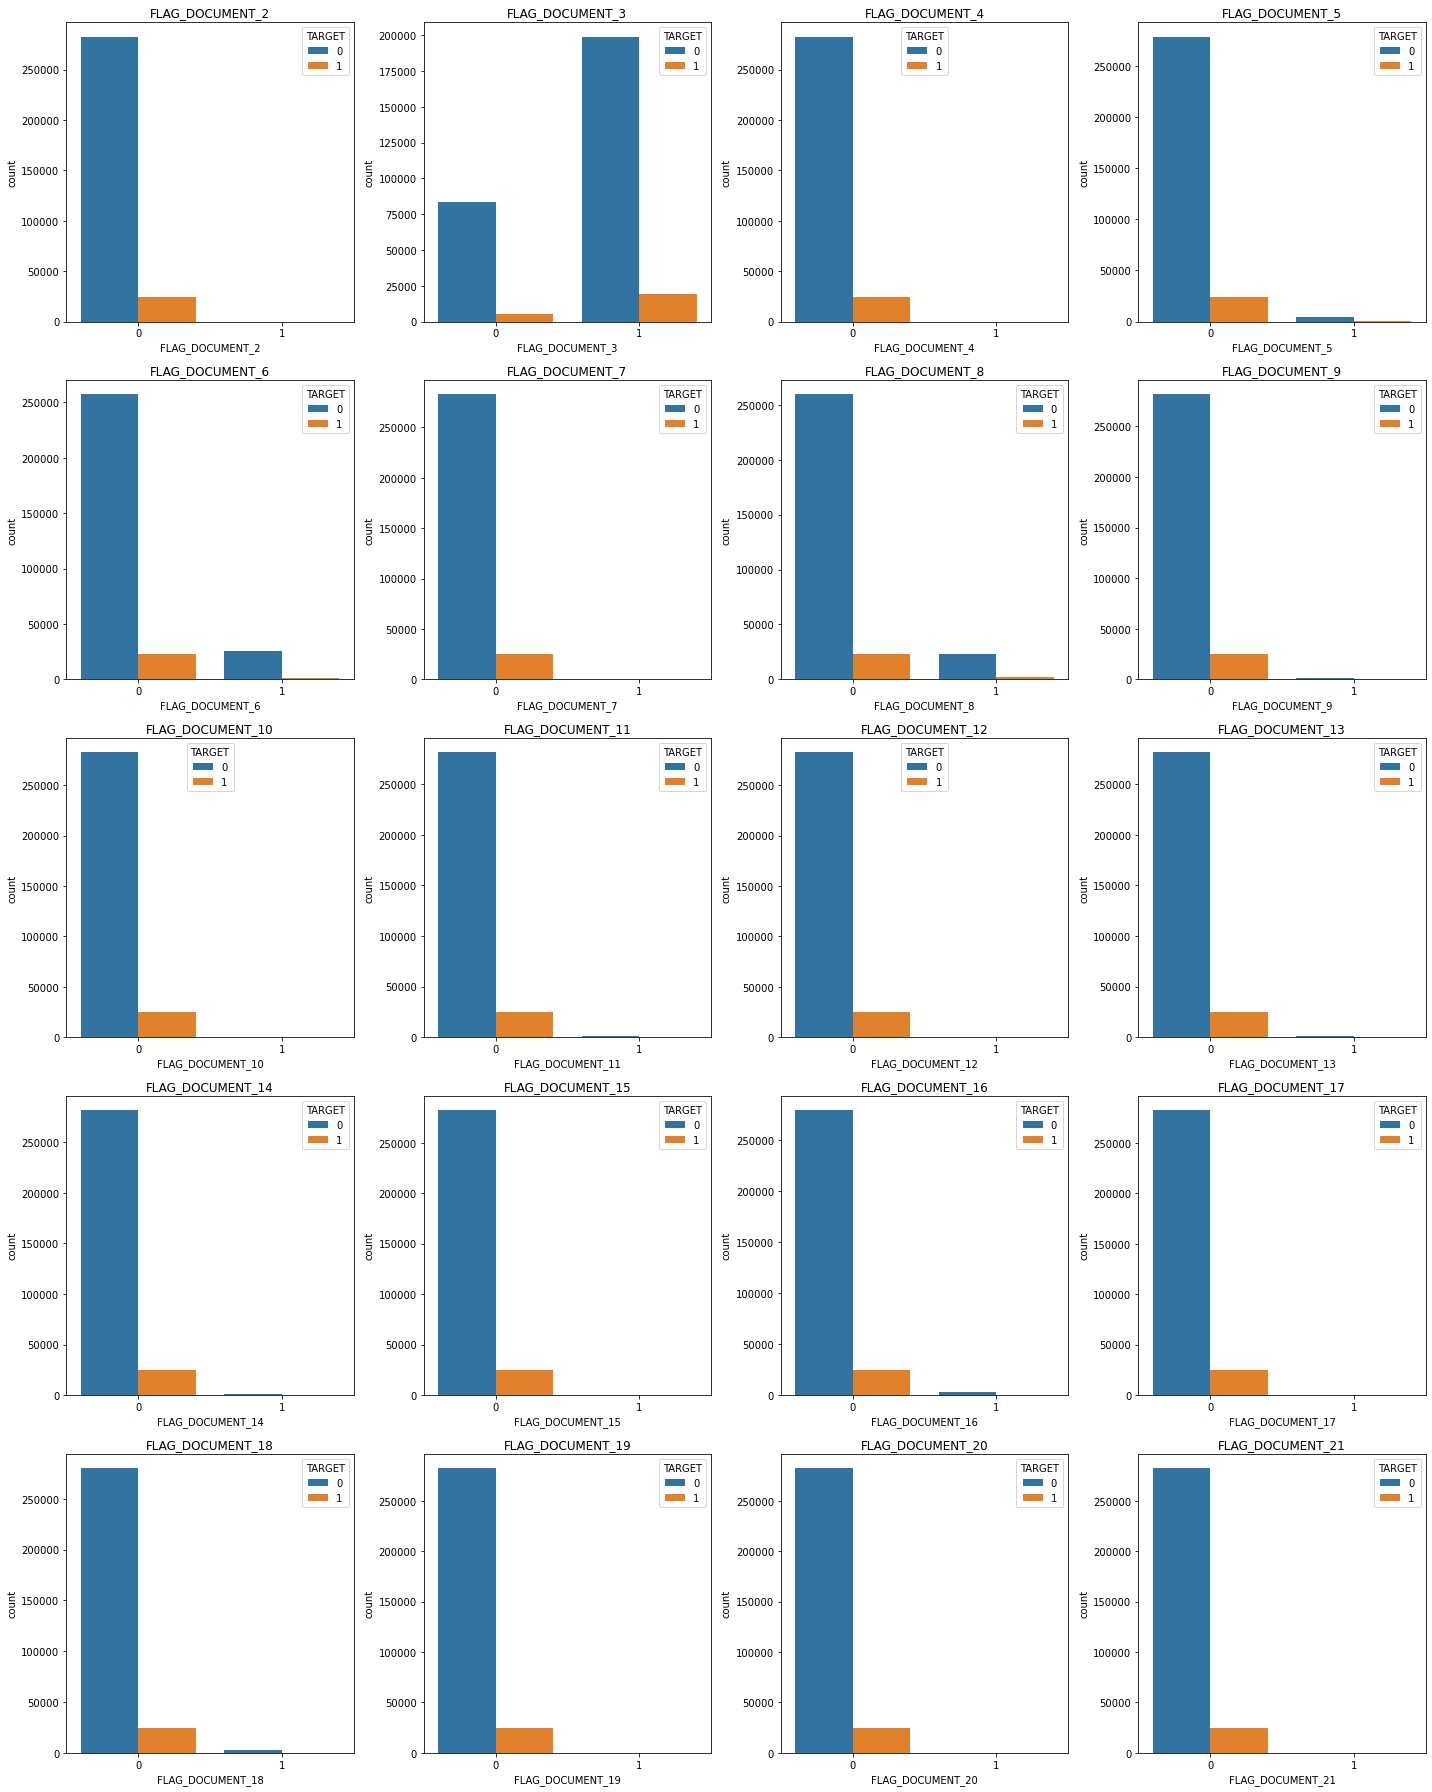

In [20]:
plt.figure(figsize=(20,25))
for i in range(len(documents_columns)):
    plt.subplot(5,4,i+1)
    plt.title(documents_columns[i])
    sns.countplot(x=appdf[documents_columns[i]],hue=appdf["TARGET"],data=appdf)
plt.tight_layout()
plt.show()

###### INFERENCES
###### Most of applicants who applied for the loan has not submitted FLAG_DOCUMENT_X except FLAG_DOCUMENT_3. So we can delete rest
###### other columns except FLAG_DOCUMENT_3.

In [21]:
#removing FLAG_DOCUMENT_3 from the list as we need it for analysis
documents_columns.remove('FLAG_DOCUMENT_3')

#Convert all the column names to list and storing  it in variable.
to_delete_columns_appdf=null_columns_40_appdf['column names'].tolist()+['EXT_SOURCE_2','EXT_SOURCE_3']

#adding other unnecssary columns in the created variable.
to_delete_columns_appdf=to_delete_columns_appdf+documents_columns+contact_details_columns

#Removing the target column from the list as we need it for analysis
to_delete_columns_appdf.remove('TARGET')

In [22]:
#checking the columns which are to be removed.
to_delete_columns_appdf

['OWN_CAR_AGE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'TOTALAREA_MOD

In [23]:
#Dropping the columns which are not needed.
appdf.drop(labels=to_delete_columns_appdf,axis=1,inplace=True)

In [24]:
#checking our application_data
appdf.shape

(307511, 46)

### Deleting the uneccesary column from Previous application data.

In [25]:
null_columns_40_prevdf

,column names,null values percent
6,AMT_DOWN_PAYMENT,53.636480
12,RATE_DOWN_PAYMENT,53.636480
13,RATE_INTEREST_PRIMARY,99.643698
14,RATE_INTEREST_PRIVILEGED,99.643698
20,NAME_TYPE_SUITE,49.119754
31,DAYS_FIRST_DRAWING,40.298129
32,DAYS_FIRST_DUE,40.298129
33,DAYS_LAST_DUE_1ST_VERSION,40.298129
34,DAYS_LAST_DUE,40.298129
35,DAYS_TERMINATION,40.298129


In [26]:
#Getting the list of unwanted columns which needs to be deleted.
to_delete_columns=['AMT_DOWN_PAYMENT','RATE_DOWN_PAYMENT','RATE_INTEREST_PRIMARY','RATE_INTEREST_PRIVILEGED','NAME_TYPE_SUITE','DAYS_FIRST_DRAWING','DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE','DAYS_TERMINATION','NFLAG_INSURED_ON_APPROVAL','WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START',
                        'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY']

#checking the numer of columns to be deleted.
len(to_delete_columns)

15

In [27]:
#Deleting these 15 columns from the previous_data which will be not used for our analysis.
prevdf.drop(labels=to_delete_columns,axis=1,inplace=True)

In [28]:
#checking our previous_application data.
prevdf.shape

(1670214, 22)

### Standardising Values

##### After observing all the columns from the dataset its observed that all the days columns contains negative values, but as we know days cannot be in negative format so we need to convert that into poisitive.

In [29]:
appdf['DAYS_BIRTH']=abs(appdf['DAYS_BIRTH'])
appdf['DAYS_EMPLOYED']=abs(appdf['DAYS_EMPLOYED'])
appdf['DAYS_REGISTRATION']=abs(appdf['DAYS_REGISTRATION'])
appdf['DAYS_ID_PUBLISH']=abs(appdf['DAYS_ID_PUBLISH'])

In [30]:
prevdf['DAYS_DECISION']=abs(prevdf['DAYS_DECISION'])

#### Binning Age

In [31]:
#Lets first create a new column for the age group of the clients
appdf['Age_years']=abs(appdf.DAYS_BIRTH//365)     ###converting days in years

#Lets create the parameters required for binning.
bins=[0,20,30,40,50,60,70,80]
slots=['0-20','20-30','30-40','40-50','50-60','60-70','70 and above']
appdf['Age_Group']=pd.cut(appdf['Age_years'],bins=bins,labels=slots)

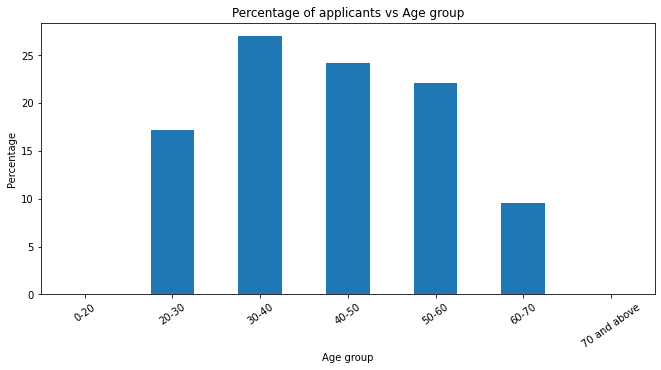

In [32]:
#Checking percentage of each category of Age_Group

plt.figure(figsize=(11,5))
(appdf['Age_Group'].value_counts(normalize=True)*100).sort_index().plot.bar()
plt.title('Percentage of applicants vs Age group')
plt.xlabel('Age group')
plt.ylabel('Percentage')
plt.xticks(rotation=35)
plt.show()

###### INFERENCES
###### More than 50% of the applicants belong to age group of 30 to 50 years

#### Binning Income

In [33]:
appdf['AMT_INCOME_TOTAL']=appdf.AMT_INCOME_TOTAL/100000

#Lets create the parameters required for binning.
bins=[0,1,2,3,4,5,6,7,8,9,10,50]
slots=['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k','800k-900k','900k-1M', 'Above 1M']
appdf['AMT_INCOME_TOTAL_RANGE']=pd.cut(appdf['AMT_INCOME_TOTAL'],bins=bins,labels=slots)

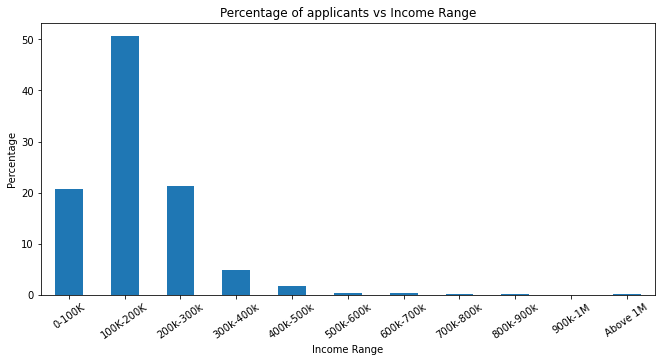

In [34]:
#Checking percentage of each category of AMT_INCOME_TOTAL

plt.figure(figsize=(11,5))
(appdf['AMT_INCOME_TOTAL_RANGE'].value_counts(normalize=True)*100).sort_index().plot.bar()
plt.title('Percentage of applicants vs Income Range')
plt.xlabel('Income Range')
plt.ylabel('Percentage')
plt.xticks(rotation=35)
plt.show()

###### INFERENCES
###### 50% applicants have income in the range of 100k to 200k                                     
###### Almost 91% applicants have income in the range of 0 to 300K                                 
###### Less than 10& applicants have income more than 300K

#### Binning Credit

In [35]:
appdf['AMT_CREDIT']=appdf.AMT_CREDIT/100000

#Lets create the parameters required for binning.
bins=[0,1,2,3,4,5,6,7,8,9,10,50]
slots=['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k','800k-900k','900k-1M', 'Above 1M']
appdf['AMT_CREDIT_RANGE']=pd.cut(appdf['AMT_CREDIT'],bins=bins,labels=slots)

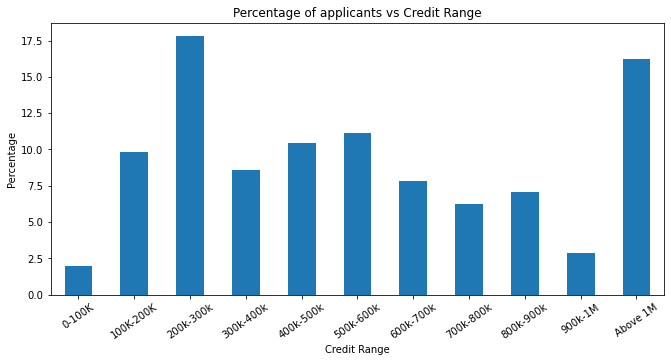

In [36]:
#Checking percentage of each category of AMT_CREDIT

plt.figure(figsize=(11,5))
(appdf['AMT_CREDIT_RANGE'].value_counts(normalize=True)*100).sort_index().plot.bar()
plt.title('Percentage of applicants vs Credit Range')
plt.xlabel('Credit Range')
plt.ylabel('Percentage')
plt.xticks(rotation=35)
plt.show()

###### INFERENCES
###### Around 16% applicants took loan of above 1M                                                    
###### Almost 18% applicants took loan in the range of 200k to 300k

#### Binning Employment Years

In [37]:
appdf['employed_years']=appdf.DAYS_EMPLOYED//365
bins=[0,5,10,20,30,40,50,60,100]
slots=['0-5','5-10','10-20','20-30','30-40','40-50','50-60','Above 60']
appdf['YEARS_EMPLOYED']=pd.cut(appdf['employed_years'],bins=bins,labels=slots)

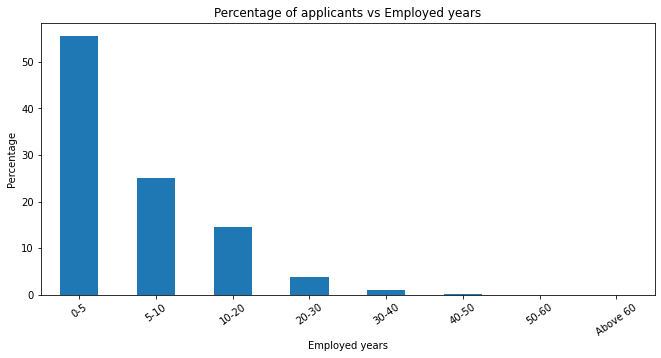

In [38]:
#Checking percentage of each category of YEARS_EMPLOYED

plt.figure(figsize=(11,5))
(appdf['YEARS_EMPLOYED'].value_counts(normalize=True)*100).sort_index().plot.bar()
plt.title('Percentage of applicants vs Employed years')
plt.xlabel('Employed years')
plt.ylabel('Percentage')
plt.xticks(rotation=35)
plt.show()

###### INFERENCES
###### More than 50% applicants are employed for last 5 years whereas almost 80% apllicants have 10 years employment

### NULL VALUE IMPUTATION

In [39]:
#Checking null values in all the columns of application data
check_null_values(appdf)

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
OCCUPATION_TYPE                31.35
CNT_FAM_MEMBERS                 0.00
REGION_RATING_CLIENT            0.00
REGION_RATING_CLIENT_W_CITY     0.00
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
R

### Null Values Imputatuion Suggestions for Application data

###### 1.As seen in the percentage data above as occupation_type has the highest missing percetage i.e(31.35%) we can create a new seperate column for this as repalcing this column with any other values may lead to a misleading data.
###### 2.we can also Impute numerical variables with the median as there are no outliers that can be seen from results of describe() and mean() also from boxplots.
###### 3.Impute 'NAME_TYPE_SUITE' which is (0.42 %)  a categorical varible with mode.

In [40]:
# Checking null Values percentage for previous applcation data.

check_null_values(prevdf)

SK_ID_PREV                 0.00
SK_ID_CURR                 0.00
NAME_CONTRACT_TYPE         0.00
AMT_ANNUITY               22.29
AMT_APPLICATION            0.00
AMT_CREDIT                 0.00
AMT_GOODS_PRICE           23.08
NAME_CASH_LOAN_PURPOSE     0.00
NAME_CONTRACT_STATUS       0.00
DAYS_DECISION              0.00
NAME_PAYMENT_TYPE          0.00
CODE_REJECT_REASON         0.00
NAME_CLIENT_TYPE           0.00
NAME_GOODS_CATEGORY        0.00
NAME_PORTFOLIO             0.00
NAME_PRODUCT_TYPE          0.00
CHANNEL_TYPE               0.00
SELLERPLACE_AREA           0.00
NAME_SELLER_INDUSTRY       0.00
CNT_PAYMENT               22.29
NAME_YIELD_GROUP           0.00
PRODUCT_COMBINATION        0.02
dtype: float64

### Null Values Imputation Suggestions for Previous Application Data.
###### 1.AMT_ANNUITY column in previous data can be imputed with mean but if the data is too skewed then we can impute it with median.
###### 2.AMT_GOOD_PRICE can be imputed with mode as mean could not be  the soultion becassue its goods price data.

### FINDING OUTLIERS


#### Finding the outliers for the columns in application data dataset.

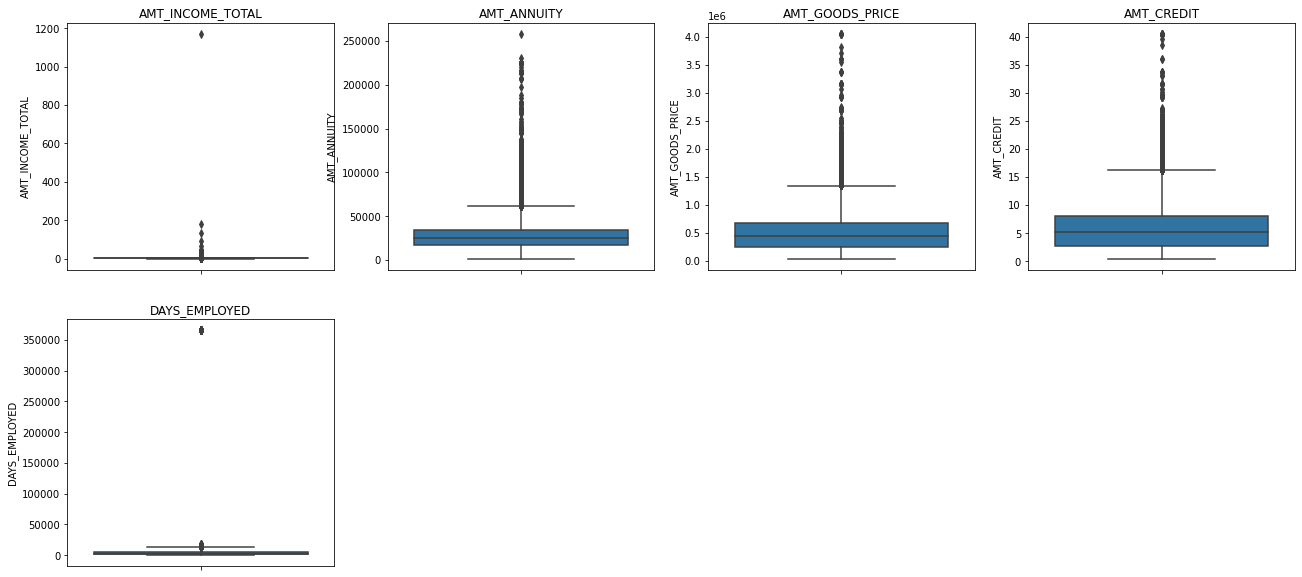

In [41]:
plt.figure(figsize=(22,10))

appdf_outliers = ['AMT_INCOME_TOTAL','AMT_ANNUITY','AMT_GOODS_PRICE','AMT_CREDIT','DAYS_EMPLOYED']
for i in enumerate(appdf_outliers):
    plt.subplot(2,4,i[0]+1)
    sns.boxplot(y=appdf[i[1]])
    plt.title(i[1])

###### INFERENCES
###### AMT_INCOME_TOTAL has some outliers which shows that there are some applicants with very high income             
###### AMT_ANNUITY, AMT_GOODS_PRICE, AMT_CREDIT have very high number of outliers                                       
###### DAYS_EMPLOYED column has less number of outliers with value around 350000 days which is impossible hence it is incorrect entry

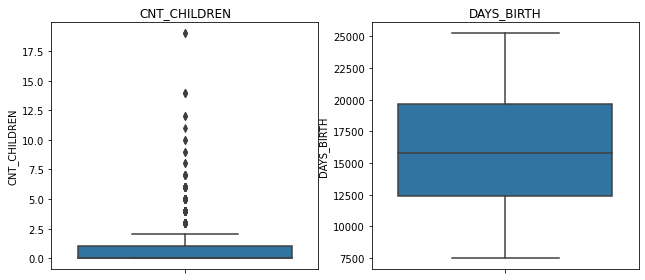

In [42]:
plt.figure(figsize=(22,10))
appdf_outliers_2 = ['CNT_CHILDREN','DAYS_BIRTH']
for i in enumerate(appdf_outliers_2):
    plt.subplot(2,4,i[0]+6)
    sns.boxplot(y=appdf[i[1]])
    plt.title(i[1])

###### INFERENCES
###### CNT_CHILDREN have few otliers with value almost 20                                                           
###### DAY_BIRTH have no outliers 

#### Finding the Outliers for the columns in Previous applciation dataset.

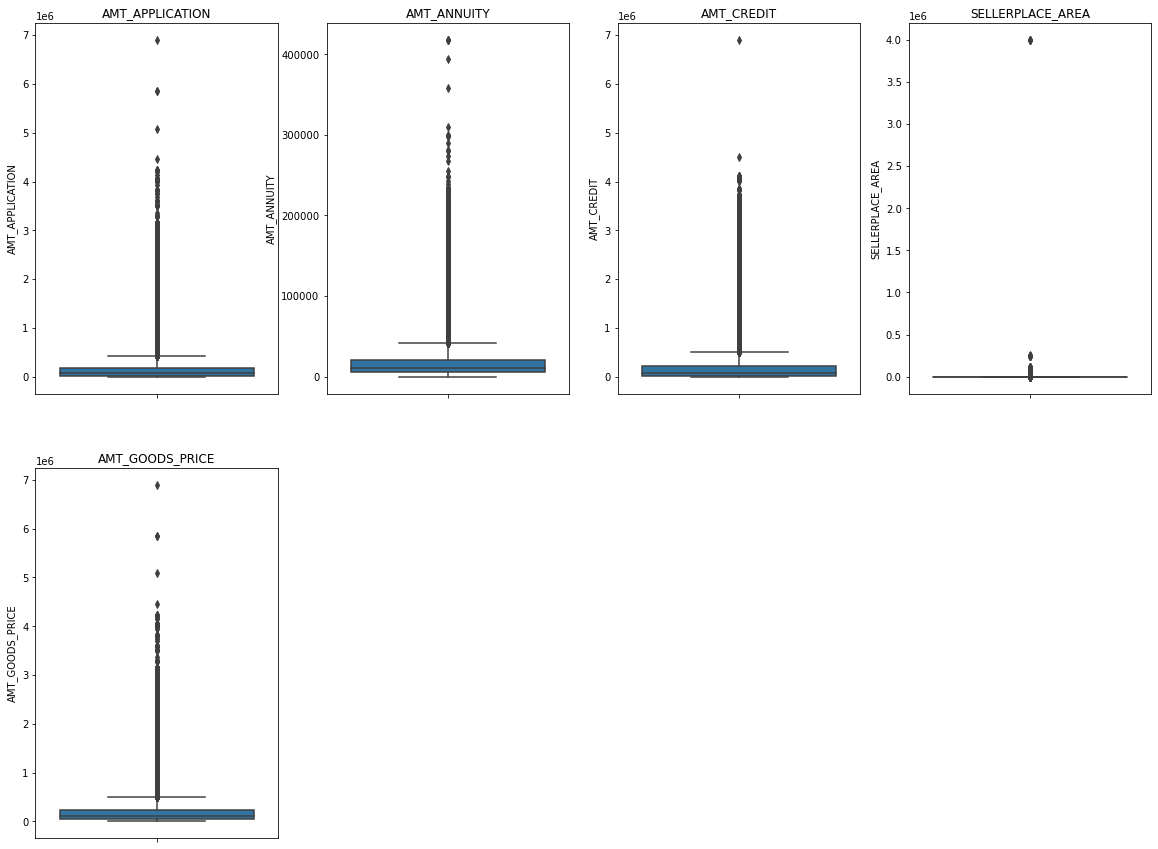

In [43]:
plt.figure(figsize=(20,15))

prevdf_outliers = ['AMT_APPLICATION','AMT_ANNUITY','AMT_CREDIT','SELLERPLACE_AREA','AMT_GOODS_PRICE']
for i in enumerate(prevdf_outliers):
    plt.subplot(2,4,i[0]+1)
    sns.boxplot(y=prevdf[i[1]])
    plt.title(i[1])
   


###### Insight
###### AMT_APPLICATION, AMT_ANNUITY, AMT_CREDIT, SELLERPLACE_AREA and AMT_GOODS_PRICE, have huge number of outliers

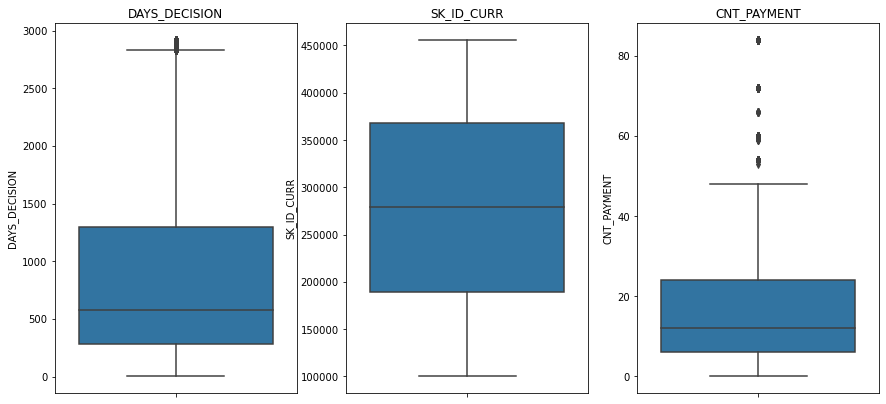

In [44]:
plt.figure(figsize=(20,15))
prevdf_outliers_1 = ['DAYS_DECISION','SK_ID_CURR','CNT_PAYMENT']

for i in enumerate(prevdf_outliers_1):
    plt.subplot(2,4,i[0]+6)
    sns.boxplot(y=prevdf[i[1]])
    plt.title(i[1])
    

###### INFERENCES
###### DAYS_DECISION and CNT_PAYMENT have very few ouliers                                                                  
###### SK_ID_CURR has no outliers since it is an ID column so it is understood

## DATA ANALYSIS

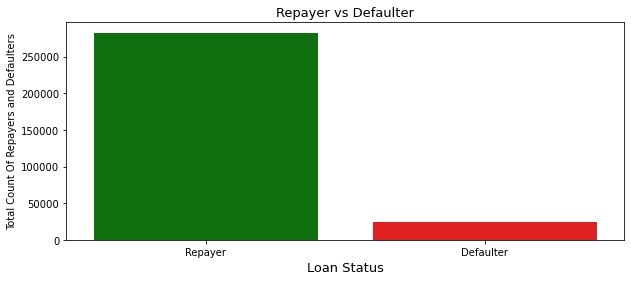

In [45]:
plt.figure(figsize=(10,4))
x= ['Repayer','Defaulter']
sns.barplot(x,y="TARGET",data = appdf["TARGET"].value_counts().reset_index(),palette= ['g','r'])
plt.xlabel("Loan Status",fontsize=13)
plt.ylabel("Total Count Of Repayers and Defaulters",fontsize=10)
plt.title('Repayer vs Defaulter',fontsize=13)
plt.show()


In [46]:
a=round(appdf.TARGET.value_counts(normalize=True)[0],2)
b=round(appdf.TARGET.value_counts(normalize=True)[1],2)
print('Imbalance Percentage of Repayers in application_data is {:.0%} and Imbalance Percentage of Defaulters in application_data is {:.0%}'.format(a,b))

Imbalance Percentage of Repayers in application_data is 92% and Imbalance Percentage of Defaulters in application_data is 8%


###### INFERENCES
###### So from Abovve barplot now we know that the imbalance percentage of Repayer and Defaulter is 92% and 8% respectively.

### UNIVARIATE ANALYSIS

In [47]:
appdf.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3',
       'AMT

In [48]:
#Partitoning application data on the basis of Target column

appdf_0=appdf[appdf['TARGET']==0]
appdf_1=appdf[appdf['TARGET']==1]

appdf_0['TARGET'].replace({0:'Repayer',1:'Defaulter'},inplace=True)
appdf_1['TARGET'].replace({0:'Repayer',1:'Defaulter'},inplace=True)
clients=['Repayer','Defaulter']


#### Lets start by creating a small fucntion for all the plots in the univariate analysis

In [49]:
def uni_cat(attribute,label_rotation=False,horizontal_layout=True): # label_rotation= to rotate the x-axis lables if overlapped.
                                                                    # Horizontal_Layout=If the data is too bing to plot then its
                                                                    # made true to plot on next axis.
    if horizontal_layout:
        fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(13,6))
    else:
        fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(20,18))
    
    #Using groupby function to get the percentage of defaulters the selected categorical variable.
    temp = appdf[[attribute, 'TARGET']].groupby(attribute).mean().reset_index()
    temp["TARGET"] = temp["TARGET"]*100
    temp.sort_values(by='TARGET', ascending=False, inplace=True) #sorting values by TARGET data.

    #### PLOT 1
    s = sns.countplot(ax=ax1, x=attribute, data=appdf_0, hue="TARGET",palette='Set2') #plotting countplot
    ax1.set_title(attribute) 
    ax1.legend(['Repayer']) 
    
    if label_rotation:
        s.set_xticklabels(s.get_xticklabels(),rotation=90) #label_rotation parameter

    #### PLOT 2
    s = sns.countplot(ax=ax2, x=attribute, data=appdf_1,hue='TARGET',palette='Blues') #plotting barplot
    plt.ylabel(' Defaulters %', fontsize=10)
    ax2.set_title(attribute)
    ax2.legend(['Defaulter'])
    
    if label_rotation:
        s.set_xticklabels(s.get_xticklabels(),rotation=90) #label_rotation parameter
    
    #### PLOT 3
    s = sns.barplot(ax=ax3, x=attribute, y='TARGET', data=temp,palette='Set1') #plotting barplot
    plt.ylabel(' Defaulters %', fontsize=10)
    ax3.set_title(attribute + " Defaulter Percentage")
    ax3.legend(['Defaulter'])
    
    if label_rotation:
        s.set_xticklabels(s.get_xticklabels(),rotation=90) #label_rotation parameter


    plt.tight_layout()
    plt.show();  

#### NAME_CONTRACT_TYPE

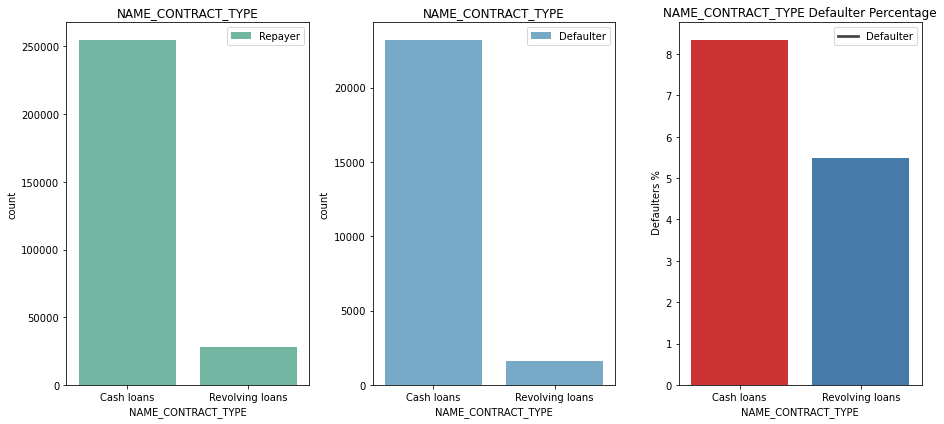

In [50]:
#using fucntion to plot countplots and barplot.
uni_cat('NAME_CONTRACT_TYPE')

###### INFERENCES:
###### 1.As we can see their are less amount of Revolving loans but still majority of the loans are not repaid.
###### 2.Large amount of cash loans are seen and also defaulter percenatge is higher for cash loans.

#### CODE_GENDER

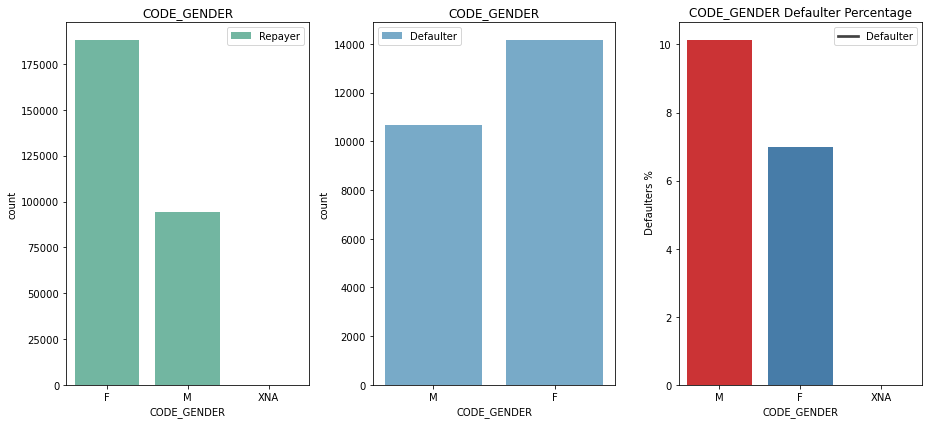

In [51]:
#using fucntion to plot countplots and barplot.
uni_cat('CODE_GENDER')

###### INFERENCES:
###### 1.We can see number of female clients is more than male clients.
###### 2.But in Defaulter % plot we can see that defaulter percentage of male clients (approx-10%) is more than female clients. This means males have less chance of returning their loans.

#### FLAG_OWN_CAR

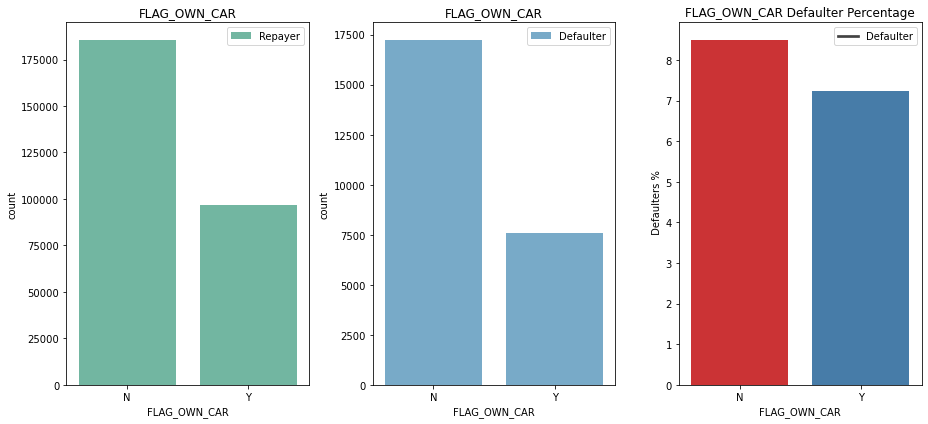

In [52]:
#using fucntion to plot countplots and barplot.
uni_cat('FLAG_OWN_CAR')

###### INFERENCES:
###### 1.We can observe that Large Number of clients does not own cars.
###### 2.In Defaulter plot client who does not own car have slightly high chances of not repaying the loan than client who owns the car but still we cant say theirs coorelation bewteen them as they both have almost same percentage of defaulters. 

#### FLAG_OWN_REALTY

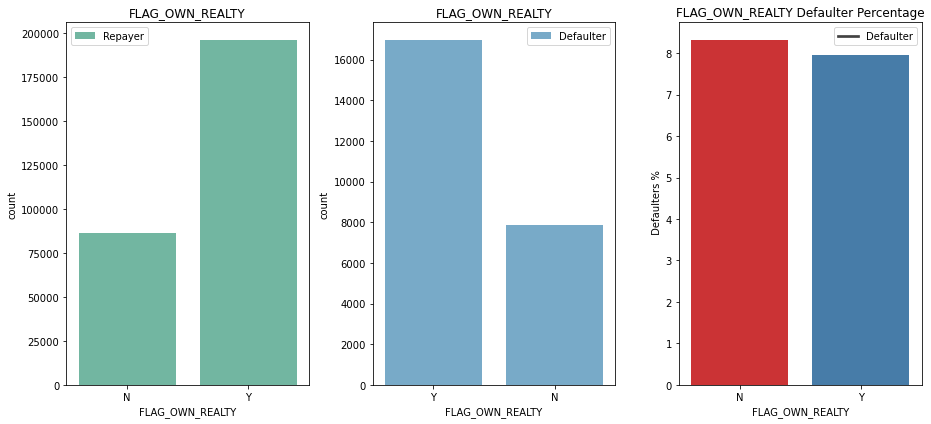

In [53]:
#using fucntion to plot countplots and barplot.
uni_cat('FLAG_OWN_REALTY')

###### INFERENCES:
###### 1.Here we can see clients who own real estate is more than half of the clients who dont own real estate.This means that majority of the clients own real etsate.
###### 2.Their is no correlation seen between the client owning real estate and defaulter of loan as their percentage of defaulters is almost same.

#### NAME_FAMILY_STATUS

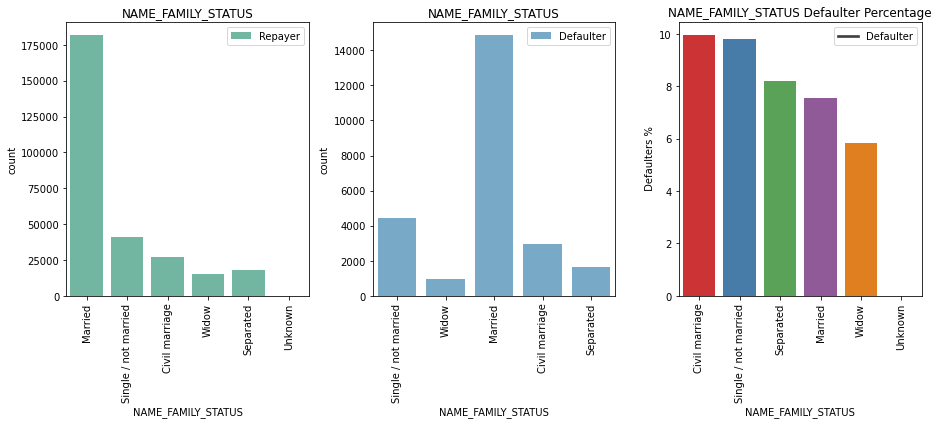

In [54]:
#using fucntion to plot countplots and barplot.
uni_cat('NAME_FAMILY_STATUS',True,True)

###### INFERENCES:
###### 1.Majority of the loans are take by married clients as seen in the plot.
###### 2.Second highest for taking the loans are Single/not Married clients and then Civil Marriages, Seperated and Widow.
###### 3.As seen in the Defaulter % plot Civil marriage (10%) has the highest percenatage of defaulters and then comes Single/not married.
###### 4.Widow has the lowest percentage of defaulter.

#### NAME_HOUSING_TYPE

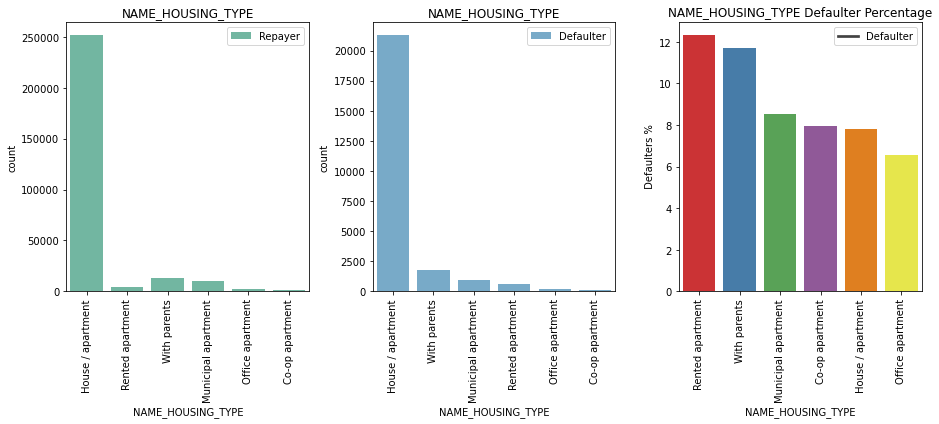

In [55]:
#using fucntion to plot countplots and barplot.
uni_cat('NAME_HOUSING_TYPE',True)

###### INFERENCES:
###### 1.From this plot we get to know that majority of the clients stays in their own House/Apartment.
###### 2.Then comes clients who lives with their parents and then comes clients who live in Muncipal apartment.
###### 3.Clients living in Rented apartment(12%) and clients living with parents(approx:11.8) have Highest default rates.

#### NAME_INCOME_TYPE

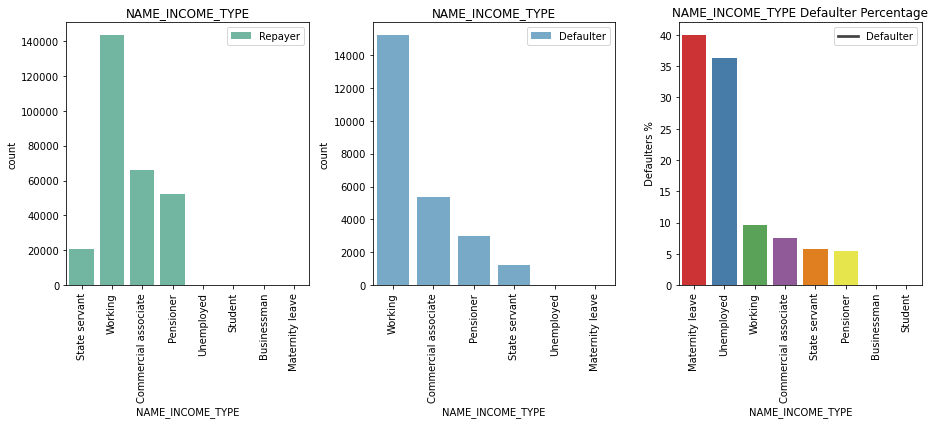

In [56]:
#using fucntion to plot countplots and barplot.
uni_cat('NAME_INCOME_TYPE',True)

###### INFERENCES:
###### 1.Large number of clients who are taking loans  are working working clients followed by Commercial associate and pensioner. 
###### 2.Clients with the type of Maternity leave (40%) are the clients not repaying the loan.
###### 3.Loan can be provided to students and businessmans as theirs almost no record of defaulters for them.So it could be the most reliable and safest option.

#### NAME_EDUCATION_TYPE

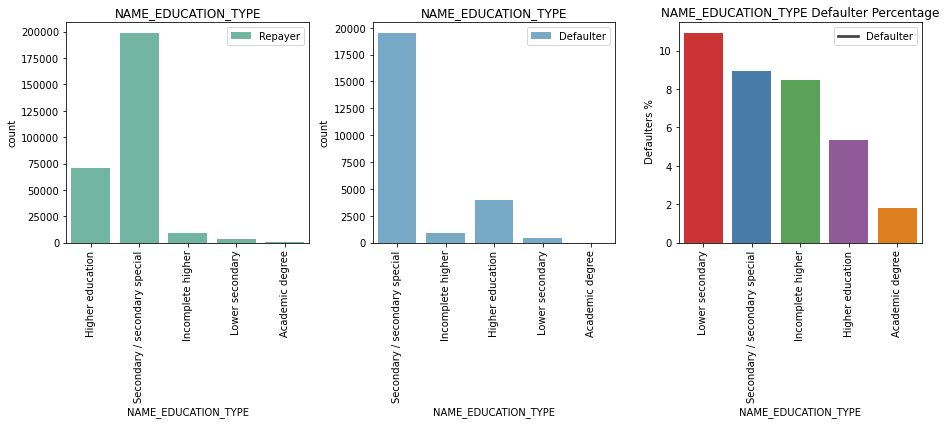

In [57]:
#using fucntion to plot countplots and barplot.
uni_cat('NAME_EDUCATION_TYPE',True)

###### INFERENCES:
###### 1.Majority of the clients have Secondary/Secondary special education then comes Higher education. 
###### 2.Defaulter % (approx:11%) of Lower secondary edcuation type is the highest.This means that clients with lower education have higher chances of not repaying the loans.
###### 3.Clients with Academic degree have the lowest defaulter %.

#### REGION_RATING_CLIENT

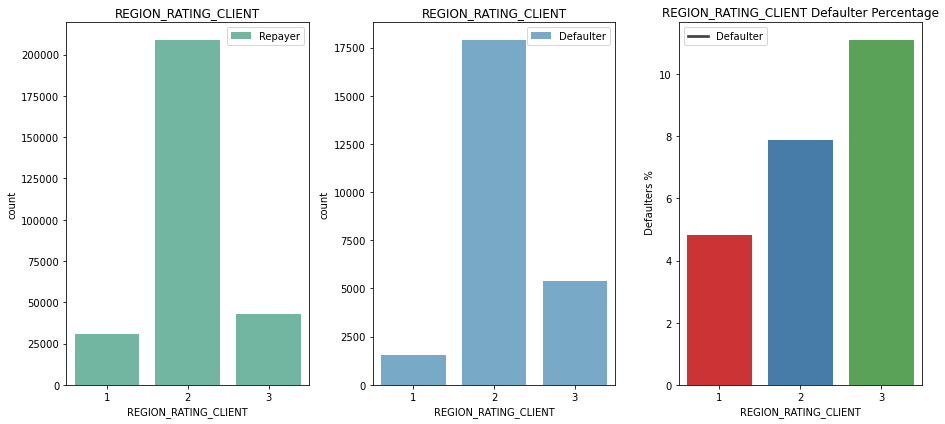

In [58]:
#using fucntion to plot countplots and barplot.
uni_cat('REGION_RATING_CLIENT')

###### INFERENCES:
###### 1.Most of the clients are living in Region Rating 2 plcaes also we can say tier 2 palces.
###### 2.Highest % of defaulters can be seeon in clients coming from Rating Region 3(Approx: 11%) also we can say tier 3 places.


#### OCCUPATION_TYPE

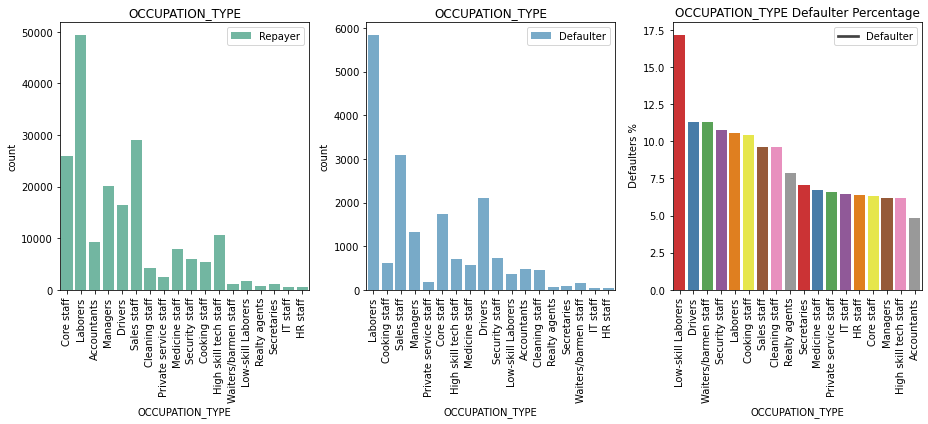

In [59]:
#using fucntion to plot countplots and barplot.
uni_cat('OCCUPATION_TYPE',True)

###### INFERENCES:
###### 1.Majority of the loans are taken by Laborers followed by Sales Staff , Core Staff,Drivers,Accountants.
###### 2.Though the percentage of loan take by low-skilled laborers are less, but it has the highest percentage of not repaying the loan.
###### 3.Then followed by Drivers, Waiters/barmen staff, security staff, laborers,cooking staff and on.

#### ORGANIZATION TYPE

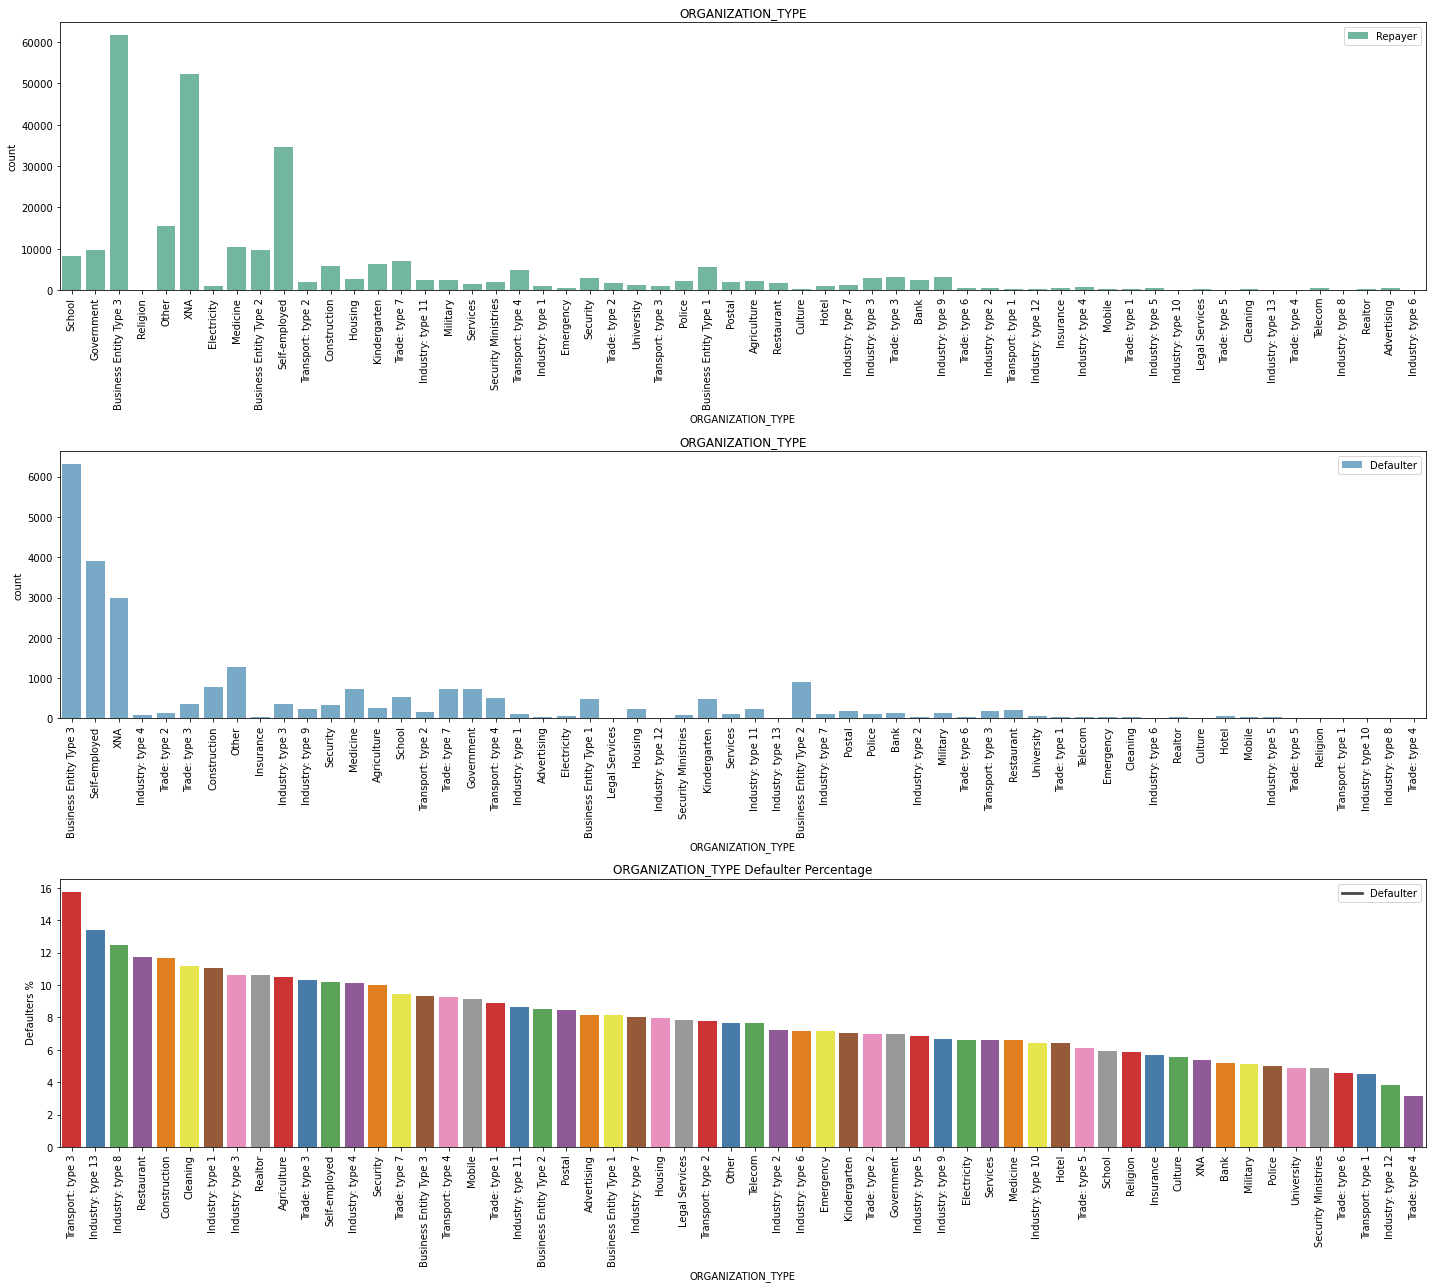

In [60]:
#using fucntion to plot countplots and barplot.
uni_cat('ORGANIZATION_TYPE',True,False)

###### INFERENCES:
###### 1.Most of the applicants are from Business Entity type 3 followed by XNA, self-employed.
###### 2.Organization with higher percentage of defaulters are Transport type 3 (approx:16%) followed by industry type 13 (approx 13%), industry type 8 (approx:12.5%).
###### 3.Trade type 4 and industry  type 12 has the lowest defaulter rate, so we could say that loan can be provided to these organization\s without any concern.

#### AGE_GROUP

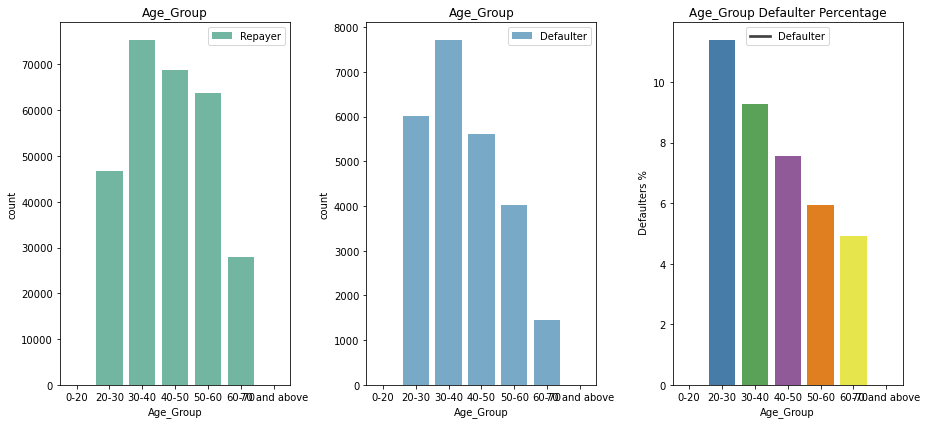

In [61]:
#using fucntion to plot countplots and barplot.
uni_cat('Age_Group')

###### INFERENCES:
###### 1.Clients within age group of 30 to 60 have the highest applicants.
###### 2.Clients with age group of 20-30 have higher chances of not repaying the loan or we can say higher chances of being defaulters.

#### AMT_CREDIT_RANGE

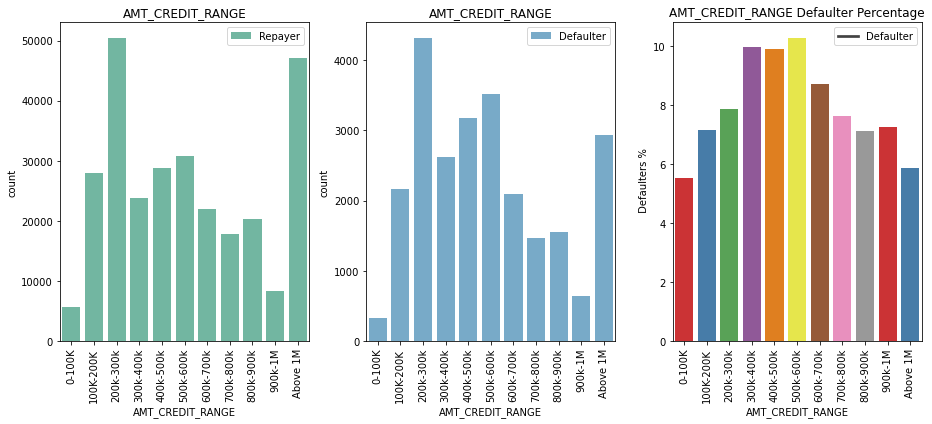

In [62]:
#using fucntion to plot countplots and barplot.
uni_cat('AMT_CREDIT_RANGE',True)

###### INFERENCES:
###### 1.Majority of the clients have been granted loan for amount between 200k-300k.
###### 2.very less amounts of clients have beenn credited with the loan amount more than 1M.
###### 3.Mostly loan credited to the clients is less than 900k.
###### 4.Cleints who have been credited with the loan between 300k to 600k has more percentage of defaulter.
    


#### EMPLOYMENT_YEAR

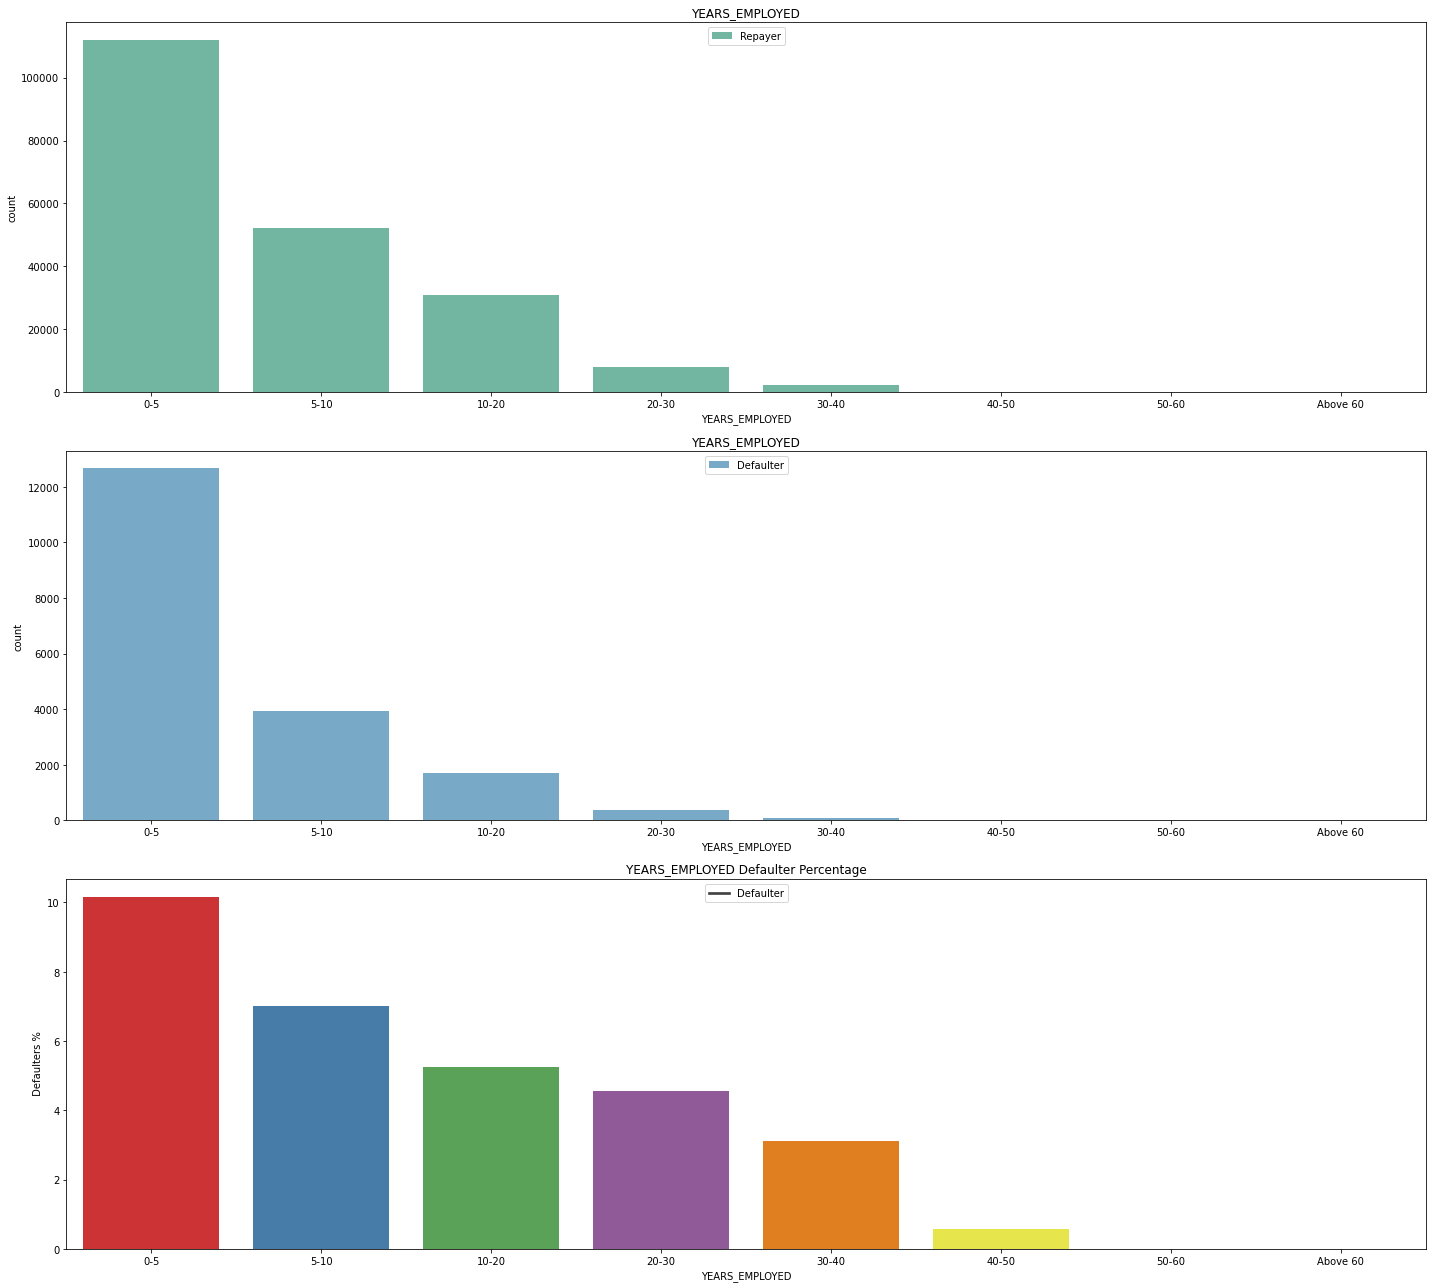

In [63]:
#using fucntion to plot countplots and barplot.
uni_cat('YEARS_EMPLOYED',False,False)

###### INFERENCES:
###### 1. Very high number of applicants lies in the range of work experience of 0 to 5 years                                                    
###### 2. Default rate for applicants with work experience of 0-5 years is high
###### 3. As the work experience goes on increasing default rate goes down

#### AMT_INCOME_RANGE

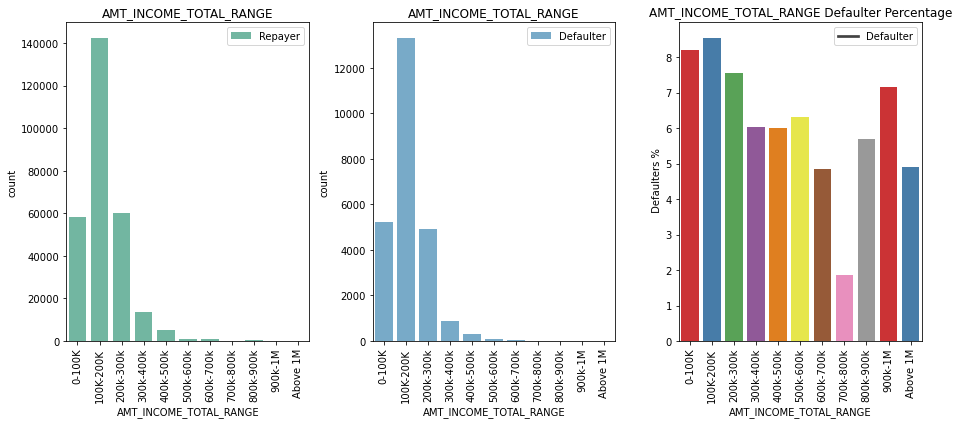

In [64]:
#using fucntion to plot countplots and barplot.
uni_cat('AMT_INCOME_TOTAL_RANGE',True)

###### INFERENCES
###### 1.Majority of the clients have the income range bewteen 100k-200k.
###### 2.Highest default rate is also for the clients with income range of 100k-200k followed by the clients with income range of 0-100k.

#### CNT_FAM_MEMBERS

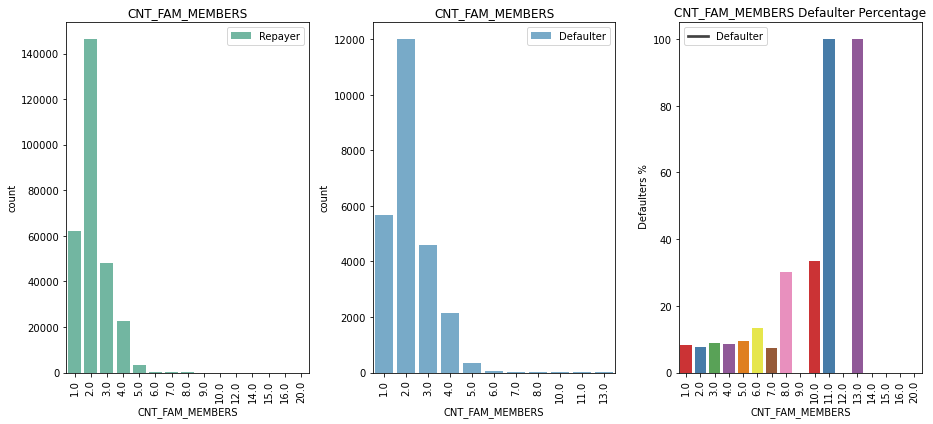

In [65]:
#using fucntion to plot countplots and barplot.
uni_cat('CNT_FAM_MEMBERS', True)

###### INFERENCES:
###### 1.Majority of the clients are having 2 members in the family followed by 1,3 and 4.
###### 2.We can see clients with members 11 and 13 have 100% of defaulter rate.

#### CNT_CHILDREN

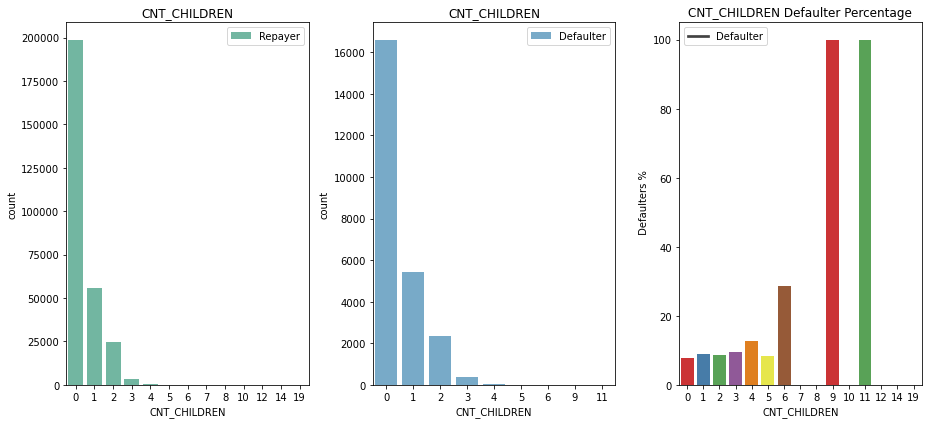

In [66]:
#using fucntion to plot countplots and barplot.
uni_cat('CNT_CHILDREN')

###### INFERENCES:
###### 1.Majority of the clients have no childrens.
###### 2.Very less clients can be seen who has 3 childrens.
###### 3.Clients with the child count 9 and 11 are showing 100% defaulter rate..

### FINDING THE CORRELATION FOR NUMERICAL COLUMNS OF APPLICATION DATA

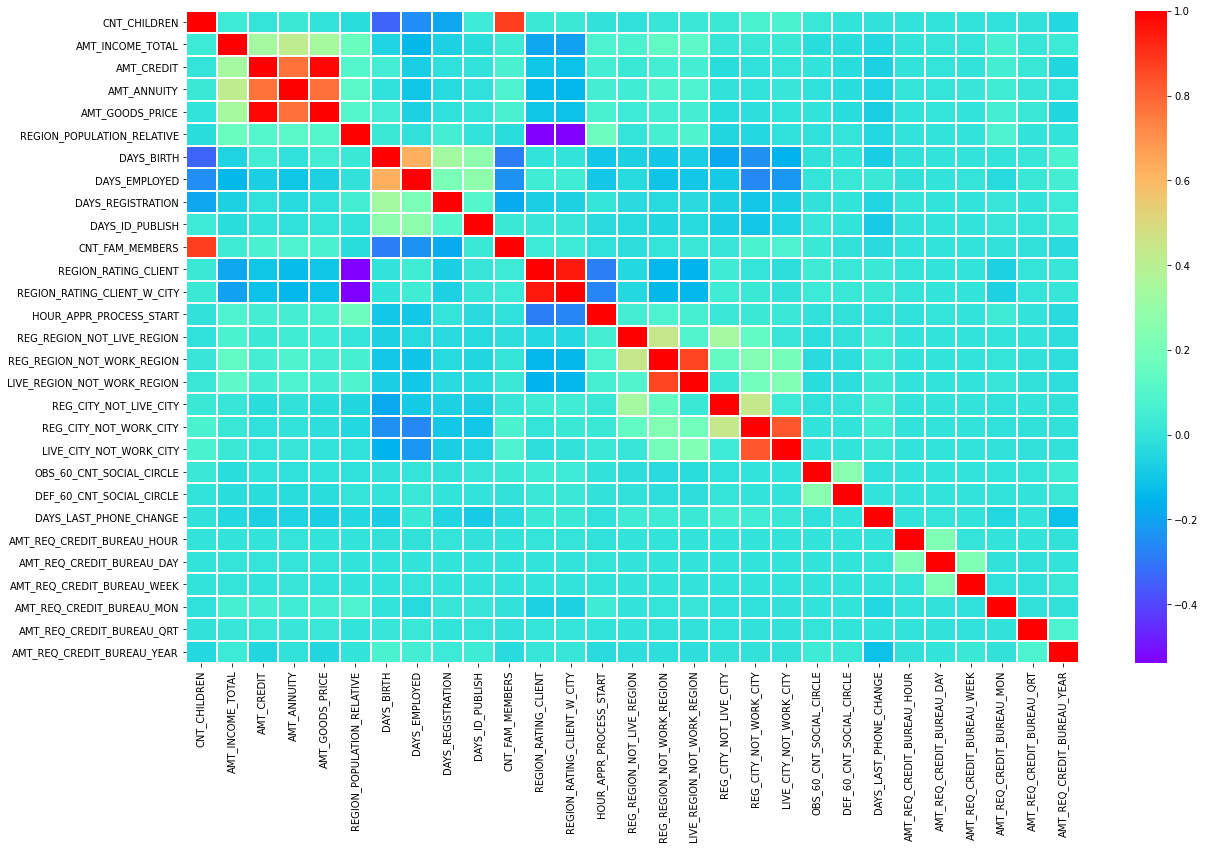

In [67]:
#Storing the numerical columns of application data.
appdf_numerical_columns=['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 
                        'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 
                        'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                        'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 
                        'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
                        'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
                        'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 
                        'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
                        'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 
                        'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
                        'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
#plotting Appdf_0 i.e repayers plot
fig = plt.figure(figsize=(20,12))
ax = sns.heatmap(appdf_0[appdf_numerical_columns].corr(),annot=False,linewidth =1,cmap='rainbow')

### INFERENCES:
###### AMT_GOODS_PRICE and AMT_CREDIT credit are highly correlated
###### CNT_FAM_MEMBERS and CNT_CHILDREN are also highly correlated
###### AMT_GOODS_PRICE and AMT_ANNUITY are Moderately correalted
###### AMT_ANNUITY and AMT_CREDIT are also moderately correlated
###### DAYS_EMPLOYED and DAYS_BIRTH are also correlated with each other

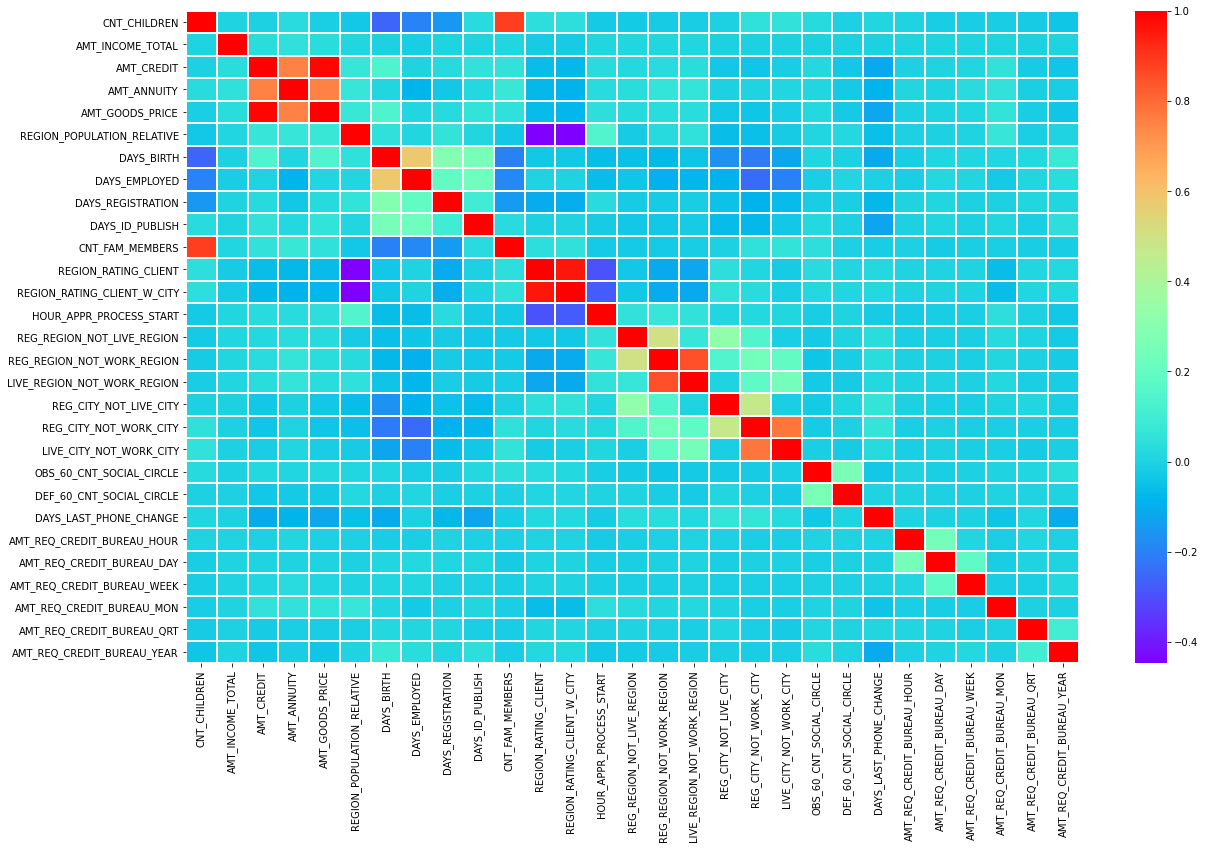

In [68]:
#Plotting appdf_1 i.e defaulters plot.
fig = plt.figure(figsize=(20,12))
ax = sns.heatmap(appdf_1[appdf_numerical_columns].corr(),annot=False,linewidth =1,cmap='rainbow')

### INFERENCES:
###### AMT_GOODS_PRICE	AMT_CREDIT are higly correlated
###### CNT_FAM_MEMBERS and CNT_CHILDREN are moderately correlated
###### AMT_GOODS_PRICE and AMT_ANNUITY are moderately correlated
###### AMT_ANNUITY and AMT_CREDIT are also correlated with each other

## BIVARIATE ANALYSIS 

### COMPARING INCOME RANGE AND GENDER

Text(0, 0.5, 'Defaulters')

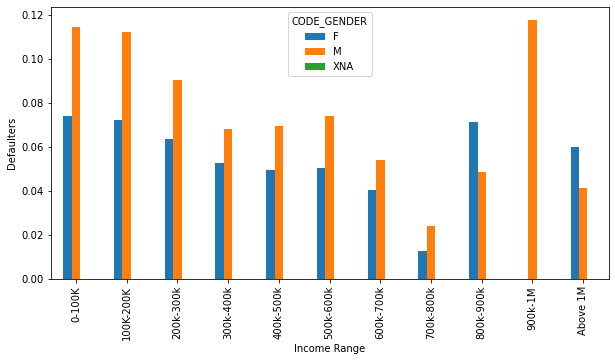

In [69]:
#using pivot table to plot the barplot
appdf.pivot_table(values='TARGET',index='AMT_INCOME_TOTAL_RANGE',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(10,5),rot=90)
plt.xlabel('Income Range')
plt.ylabel('Defaulters')

###### INFERENCES
###### 1. Male and female in the income range 0 to 100k and 100k to 200k have equal default rate around 10%
###### 2. Females earning above 1M are more likely to default than males

### COMPARING EDUCATION TYPE AND GENDER

Text(0, 0.5, 'Defaulters')

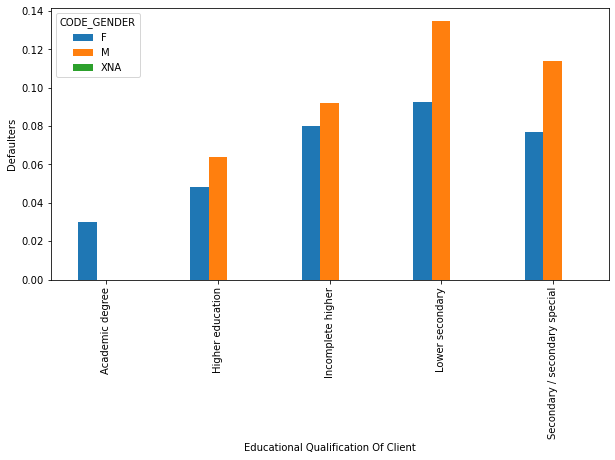

In [70]:
#using pivot table to plot the barplot
appdf.pivot_table(values='TARGET',index='NAME_EDUCATION_TYPE',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(10,5),rot=90)
plt.xlabel('Educational Qualification Of Client')
plt.ylabel('Defaulters')

###### INFERENCES:
###### 1.Males and female clients with Lower secondary Educational Qualification have higher defaulter rates.
###### 2.Then comes males clients with Secondary/secondary special who have high defaulter rate.
###### 3.People with higher education have low defaulter rate.

### COMPARING AMOUNT CREDIT RANGE AND AGE GROUP

Text(0, 0.5, 'Defaulters')

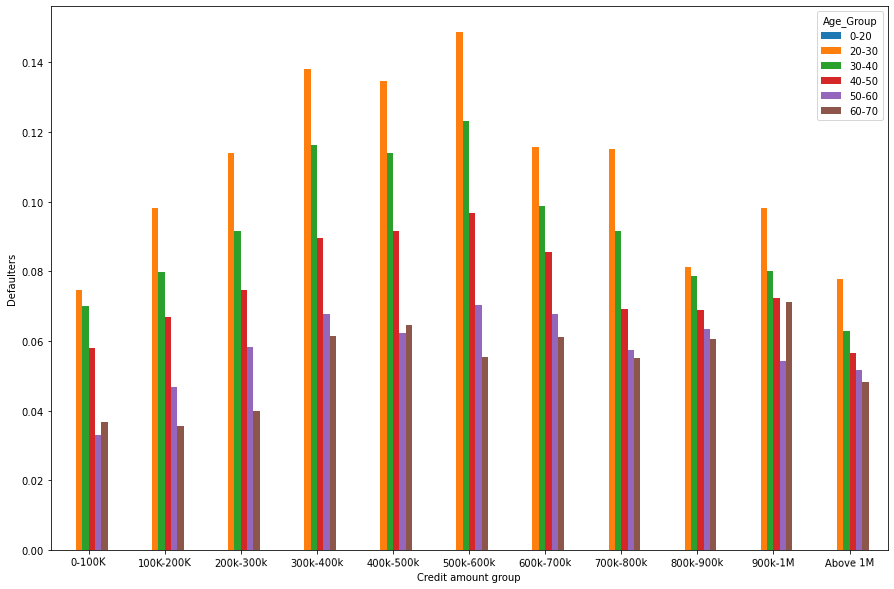

In [71]:
#using pivot table to plot the barplot
appdf.pivot_table(values='TARGET',index='AMT_CREDIT_RANGE',columns='Age_Group',aggfunc='mean').plot.bar(figsize=(15,10),rot=1)
plt.xlabel('Credit amount group')
plt.ylabel('Defaulters')

###### INFERENCES:
###### 1.Form this plot we can see that yooung clients with the average income have the most default rates.
###### 2.All the senior citizens are less liekly to be defaults.

### COMPARING INCOME TYPE AND GENDER

Text(0, 0.5, 'Defaulters')

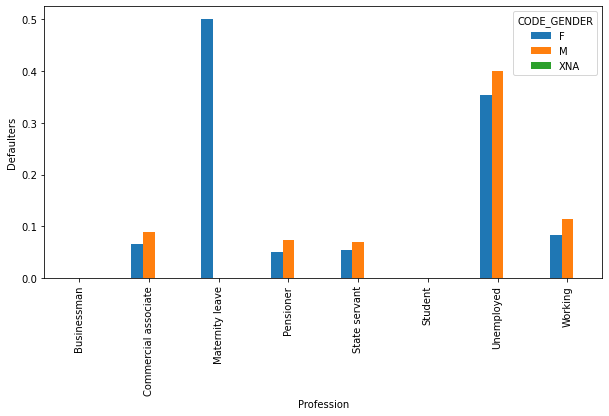

In [72]:
#using pivot table to plot the barplot
appdf.pivot_table(values='TARGET',index='NAME_INCOME_TYPE',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(10,5),rot=90)
plt.xlabel('Profession')
plt.ylabel('Defaulters')

###### INFERENCES:
###### 1.Unemployed clients have more percentage of defaulter rate.
###### 2.Also clients who are at maternity leave have the highest cahnces of defaulter rate.
###### 3.Overall males have more defaulter rate in all the Income types.

### COMPARING FAMILY STATUS AND AGE GROUP

Text(0, 0.5, 'Defaulters')

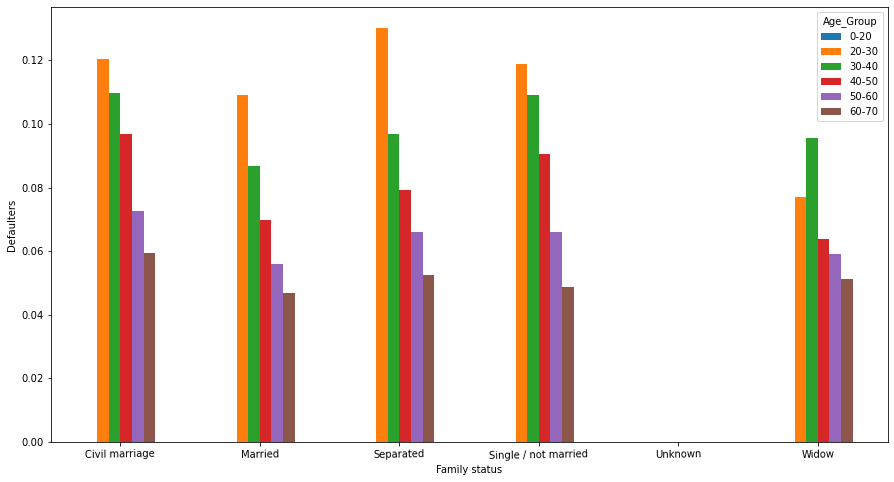

In [73]:
#using pivot table to plot the barplot
appdf.pivot_table(values='TARGET',index='NAME_FAMILY_STATUS',columns='Age_Group',aggfunc='mean').plot.bar(figsize=(15,8),rot=1)
plt.xlabel('Family status')
plt.ylabel('Defaulters')

###### INFERENCES:
###### 1.In this plot we can see that younger generations have higher percentage of defaulters in all the status except widow.
###### 2.Lowest defaulter rate are the cleints who are elderly age.

### COMPARING FAMILY STATUS AND CODE GENDER

Text(0, 0.5, 'Defaulters')

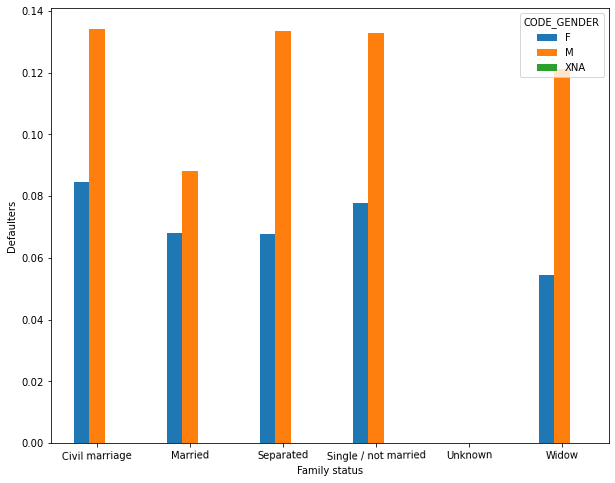

In [104]:
#using pivot table to plot the barplot
appdf.pivot_table(values='TARGET',index='NAME_FAMILY_STATUS',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(10,8),rot=1)
plt.xlabel('Family status')
plt.ylabel('Defaulters')

###### INFERENCES:
###### 1.We can see that whichever the family status is itn, male clients are the ones with high default rate.
###### 2.If we see females have higher default rates with the family status of civil marriage followed by single/not married

## MERGING APPLICATION DATA AND PREVIOUS DATA

In [75]:
application_data_columns= ['SK_ID_CURR','TARGET','CODE_GENDER','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','Age_Group','AMT_INCOME_TOTAL_RANGE']

In [76]:
# Creating a dataset from current application for merging 
appdf_merge = appdf[application_data_columns]
appdf_merge.head()

,SK_ID_CURR,TARGET,CODE_GENDER,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,Age_Group,AMT_INCOME_TOTAL_RANGE
0,100002,1,M,Secondary / secondary special,Single / not married,20-30,200k-300k
1,100003,0,F,Higher education,Married,40-50,200k-300k
2,100004,0,M,Secondary / secondary special,Single / not married,50-60,0-100K
3,100006,0,F,Secondary / secondary special,Civil marriage,50-60,100K-200K
4,100007,0,M,Secondary / secondary special,Single / not married,50-60,100K-200K


In [77]:
#Merging the tow datasets.
final_df_merge = pd.merge(prevdf,appdf_merge, on='SK_ID_CURR', how='left')
final_df_merge.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,TARGET,CODE_GENDER,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,Age_Group,AMT_INCOME_TOTAL_RANGE
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,XAP,Approved,73,...,Connectivity,12.0,middle,POS mobile with interest,0.0,F,Incomplete higher,Married,30-40,200k-300k
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,XNA,Approved,164,...,XNA,36.0,low_action,Cash X-Sell: low,0.0,F,Secondary / secondary special,Civil marriage,50-60,0-100K
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,XNA,Approved,301,...,XNA,12.0,high,Cash X-Sell: high,0.0,F,Secondary / secondary special,Married,20-30,0-100K
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,XNA,Approved,512,...,XNA,12.0,middle,Cash X-Sell: middle,0.0,M,Secondary / secondary special,Married,50-60,300k-400k
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,Repairs,Refused,781,...,XNA,24.0,high,Cash Street: high,0.0,F,Secondary / secondary special,Married,20-30,100K-200K


In [78]:
final_df_merge.shape

(1670214, 28)

In [79]:
#Removing the rows containing nan values in the target column.
final_df_merge= final_df_merge[(~(np.isnan(final_df_merge['TARGET'])))]   

In [80]:
#Getting the info of the merged columns.
final_df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1670213
Data columns (total 28 columns):
 #   Column                  Non-Null Count    Dtype   
---  ------                  --------------    -----   
 0   SK_ID_PREV              1413701 non-null  int64   
 1   SK_ID_CURR              1413701 non-null  int64   
 2   NAME_CONTRACT_TYPE      1413701 non-null  object  
 3   AMT_ANNUITY             1106483 non-null  float64 
 4   AMT_APPLICATION         1413701 non-null  float64 
 5   AMT_CREDIT              1413700 non-null  float64 
 6   AMT_GOODS_PRICE         1094176 non-null  float64 
 7   NAME_CASH_LOAN_PURPOSE  1413701 non-null  object  
 8   NAME_CONTRACT_STATUS    1413701 non-null  object  
 9   DAYS_DECISION           1413701 non-null  int64   
 10  NAME_PAYMENT_TYPE       1413701 non-null  object  
 11  CODE_REJECT_REASON      1413701 non-null  object  
 12  NAME_CLIENT_TYPE        1413701 non-null  object  
 13  NAME_GOODS_CATEGORY     1413701 non-null  

### UNIVARTIE ANALYSIS ON OUR FINAL MERGED DATASET

### NAME_CONTRACT_STATUS

[Text(0.5, 0, 'LOAN STATUS')]

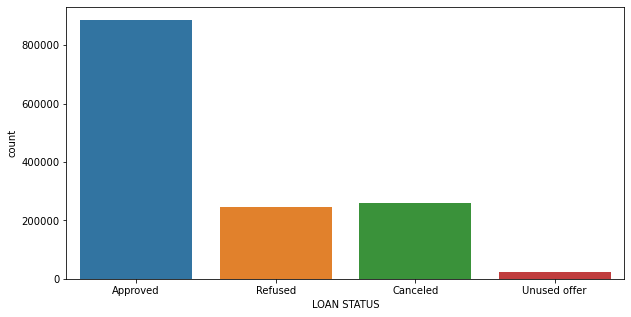

In [81]:
#Ploting the countplot for univariate analysis.
plt.figure(figsize=(10,5))   
ax = sns.countplot(x = 'NAME_CONTRACT_STATUS',data=final_df_merge)
ax.set(xlabel='LOAN STATUS')

###### INFERENCES:
###### 1.Mostly Loans are being approved
###### 2.Amost same number loans are being refused or either got canceled

### NAME_PORTFOLIO

[Text(0.5, 0, 'Portfolio')]

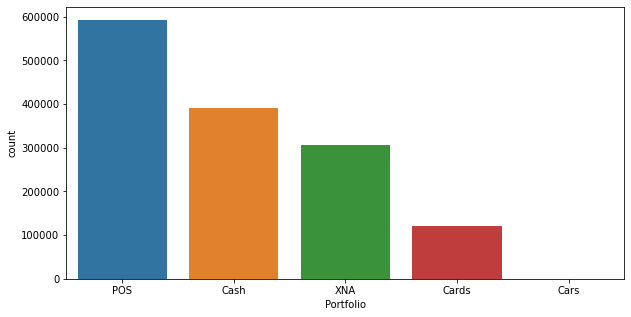

In [82]:
#Ploting the countplot for univariate analysis.
plt.figure(figsize=(10,5))   
ax = sns.countplot(x = 'NAME_PORTFOLIO',data=final_df_merge)
ax.set(xlabel='Portfolio')

###### INFERENCES:
###### Most of the previous applciations were for POS followed by cash.

### NAME_CLIENT_TYPE

[Text(0.5, 0, 'Client type')]

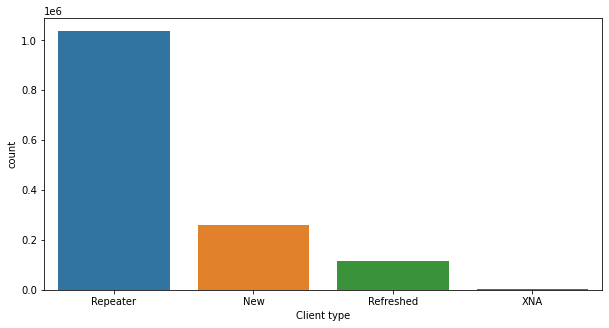

In [83]:
#Ploting the countplot for univariate analysis.
plt.figure(figsize=(10,5))   
ax = sns.countplot(x = 'NAME_CLIENT_TYPE',data=final_df_merge)
ax.set(xlabel='Client type')

###### INFERENCES:
###### Most of the applications were repeater followed by new and refreshed.

### AMT_APPLICATION

[Text(0.5, 0, 'Application amount')]

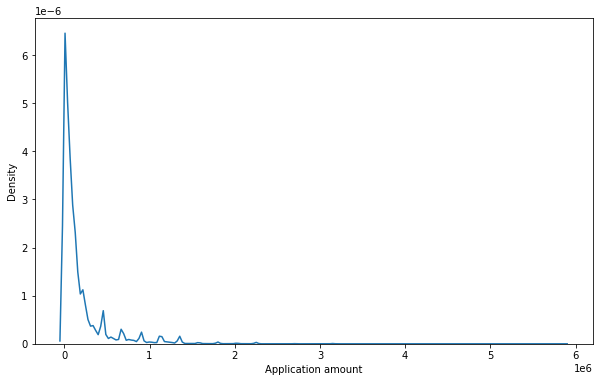

In [84]:
#plotting the distplot
plt.figure(figsize=(10,6))
ax = sns.distplot(final_df_merge['AMT_APPLICATION'],hist=False)
ax.set(xlabel='Application amount')

### CORRELATION OF NUMERICAL COLUMNS OF PREVIOUS APPLICATION DATA.

In [85]:
#getting the correlation of numerical columns.
numerical_columns=['AMT_APPLICATION','AMT_CREDIT','AMT_ANNUITY','CNT_PAYMENT']
corr_numerical_columns=final_df_merge[numerical_columns]
corr_numerical_columns.corr()

,AMT_APPLICATION,AMT_CREDIT,AMT_ANNUITY,CNT_PAYMENT
AMT_APPLICATION,1.000000,0.975683,0.809972,0.683056
AMT_CREDIT,0.975683,1.000000,0.817977,0.675539
AMT_ANNUITY,0.809972,0.817977,1.000000,0.398084
CNT_PAYMENT,0.683056,0.675539,0.398084,1.000000


Text(0.5, 1.0, 'CORRELATION OF NUMERICAL COLUMNS')

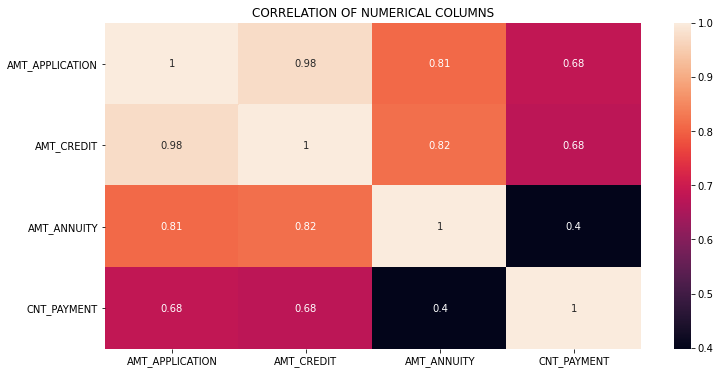

In [86]:
#plotting heatmap for the correlation of numerical columns in previous apllication data.
plt.figure(figsize=(12,6))
a=sns.heatmap(corr_numerical_columns.corr(),annot=True)
plt.title('CORRELATION OF NUMERICAL COLUMNS')

###### INFERENCES:
###### According to the heat map highly correlated columns are AMT_APPLICATION and AMT_ANNUITY, AMT_CREDIT and AMT_ANNUITY, AMT_APPLICATION AND AMT_CREDIT.

### BIVARIATE ANALYSIS

### COMPARING CLIENT TYPE AND STATUS

Text(0.5, 0, 'Client Type')

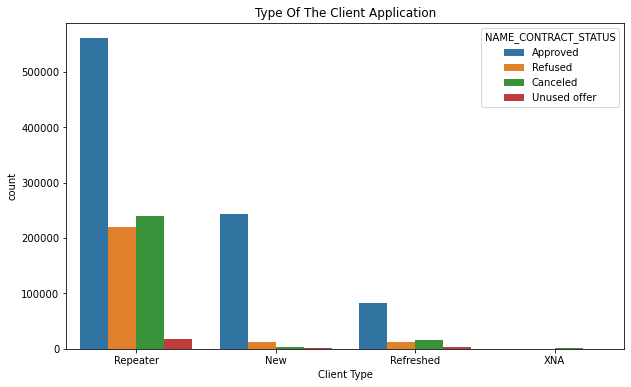

In [97]:
#Plotting Countplot for comparison
plt.figure(figsize=(10,6))

sns.countplot(x = 'NAME_CLIENT_TYPE' ,hue = 'NAME_CONTRACT_STATUS', data = final_df_merge)
plt.title('Type Of The Client Application')
plt.xlabel('Client Type')


###### INFERENCES:
###### Most of the approved loans are off the repeater clients.

 ### COMPARING STATUS AND CLIENT TYPE

Text(0, 0.5, 'Current defaulters')

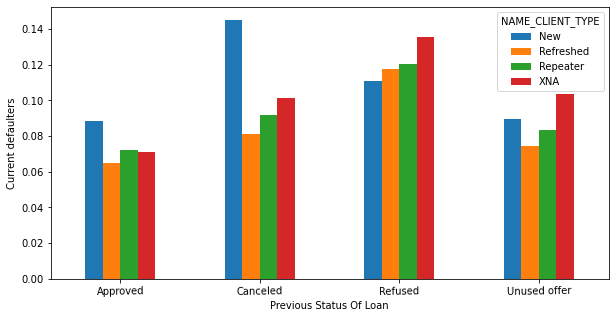

In [88]:
#using pivot table to plot the barplot
final_df_merge.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='NAME_CLIENT_TYPE',aggfunc='mean').plot.bar(figsize=(10,5),rot=1)

plt.xlabel('Previous Status Of Loan')
plt.ylabel('Application defaulters')

###### INFERENCES:
###### 1.From the previous status of the loans we can see that their higher rates canceled nenw loans.
###### 2.We also can see that clients which were previously approved are more defaulted than the others.

### COMAPRING CONTRACT STATUS AND GENDER

Text(0, 0.5, 'Current defaulters')

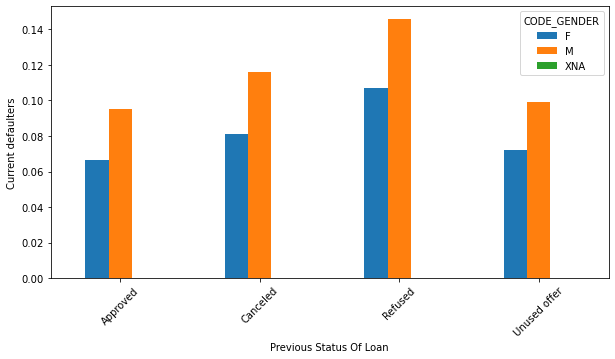

In [96]:
#using pivot table to plot the barplot
final_df_merge.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(10,5),rot=45)
plt.xlabel('Previous Status Of Loan')
plt.ylabel('Application defaulters')

###### INFERENCES:
###### 1.In all the cases here males can be seen more defaulted than females.

### Comparing NAME_CONTRACT_STATUS and AGE GROUP

Text(0, 0.5, 'Application defaulters')

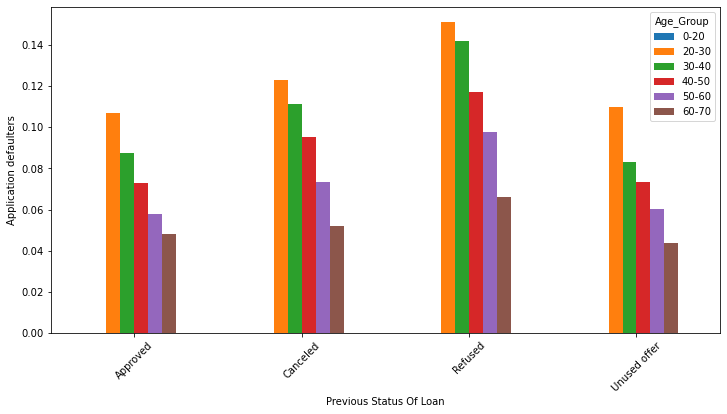

In [95]:
#using pivot table to plot the barplot
final_df_merge.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='Age_Group',aggfunc='mean').plot.bar(figsize=(12,6),rot=45)
plt.xlabel('Previous Status Of Loan')
plt.ylabel('Application defaulters')

###### INFERENCES:
###### 1.As we can see in all the cases higher precentagews of young clients can be seen.
###### 2.Refused clients are more defaulted than the previosuly approved clients.

### Comparing NAME_CONTRACT_STATUS and NAME_PORTFOLIO

Text(0, 0.5, 'Application defaulters')

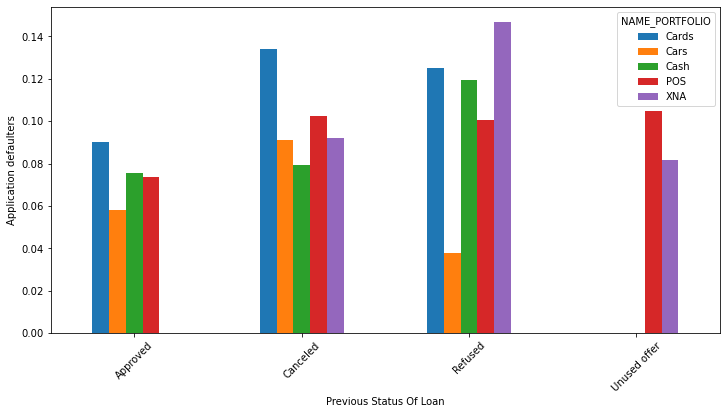

In [94]:
#using pivot table to plot the barplot
final_df_merge.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='NAME_PORTFOLIO',aggfunc='mean').plot.bar(figsize=(12,6),rot=45)
plt.xlabel('Previous Status Of Loan')
plt.ylabel('Application defaulters')

###### INFERENCES:
###### 1.Clients who previously applied for cards are mostly likely to default.
###### 2.Also clients who have applied for XNA also most of them are defaulters

## FINAL RECOMMENDATIONS

### Overall Recommendations
1. It is more safe to grant the loan to mid age clients and senior citizen clients with higher income.
2. Loan can be granteed to highly educated clients because thier is very less chance of them being a defaulter.
3. Overall females have less chance of being a defaulter than males so loan can be granted to them.
4. Married cleints should also be given loans beacuse it has less defaulter rate as compared to other family status.

### Overall Risks
1. Clients with low income groups should be avoided because of higher chances of being  defaulter.
2. Unemployed clients can also be a big risk factor for providing with loan.
3. External credit score should be also considered before approving the clients appplication as it consits of clients credit score.
4. Lower secondary and secondary educated clients should be avoided for loan as they have high defaulter rates.
